# Exploratory data analysis (EDA)


## Dataset: hotel booking dataset

#### Some Background Information

Context
Have you ever wondered when the best time of year to book a hotel room is?
Or the optimal length of stay in order to get the best daily rate? 
What if you wanted to predict whether or not a hotel was likely to 
receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!






In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats
import statsmodels.api as sm

import pandas_profiling
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
#Importing Dataset
data=pd.read_csv(r'C:\Users\PKK\Desktop\EDA\Hote_EDA\Dataset\hotel_bookings.csv')
data.head(10)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
5  Resort Hotel            0         14               2015               July   
6  Resort Hotel            0          0               2015               July   
7  Resort Hotel            0          9               2015               July   
8  Resort Hotel            1         85               2015               July   
9  Resort Hotel            1         75               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   
5                        27                          1   
6                        27                          1   
7                        27                          1   
8                        27                          1   
9                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   
5                        0                     2       2       0.0       0   
6                        0                     2       2       0.0       0   
7                        0                     2       2       0.0       0   
8                        0                     3       2       0.0       0   
9                        0                     3       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   
5   BB     GBR      Online TA                TA/TO                  0   
6   BB     PRT         Direct               Direct                  0   
7   FB     PRT         Direct               Direct                  0   
8   BB     PRT      Online TA                TA/TO                  0   
9   HB     PRT  Offline TA/TO                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   
5                       0                               0                  A   
6                       0                               0                  C   
7                       0                               0                  C   
8                       0                               0                  A   
9               

In [7]:
#Importing predefined methods
from dataset_info import Outlier_analysis,Dataset_inspection

### Description of the Dataset

In [8]:
Dataset_inspection(data).dataset_info()


Shape of Dataset (119390, 32)

Number of Rows 119390 
Number of Columns:  32

Feature Names : 
 ['hotel' 'is_canceled' 'lead_time' 'arrival_date_year'
 'arrival_date_month' 'arrival_date_week_number'
 'arrival_date_day_of_month' 'stays_in_weekend_nights'
 'stays_in_week_nights' 'adults' 'children' 'babies' 'meal' 'country'
 'market_segment' 'distribution_channel' 'is_repeated_guest'
 'previous_cancellations' 'previous_bookings_not_canceled'
 'reserved_room_type' 'assigned_room_type' 'booking_changes'
 'deposit_type' 'agent' 'company' 'days_in_waiting_list' 'customer_type'
 'adr' 'required_car_parking_spaces' 'total_of_special_requests'
 'reservation_status' 'reservation_status_date']

Information about Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119

### Missing Data Analysis

Any missing datapoints in dataset: True
Columnwise missing data present in the dataset
          total_missing_count  percentage_missing datatype
children                    4            0.003350  float64
country                   488            0.408744   object
agent                   16340           13.686238  float64
company                112593           94.306893  float64

 
 Total percentage of missing data : 3.387663330262166  % 


 Total percentage of rows affected by missing data : 99.8182427338973 % 



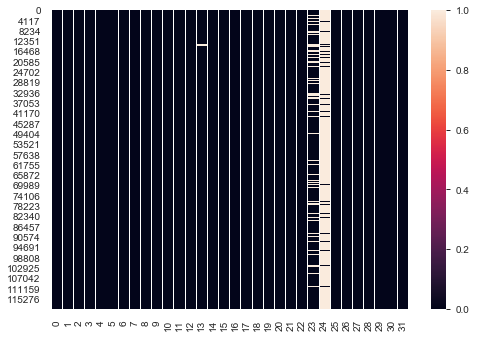

In [9]:
#calling predefined method
Dataset_inspection(data).missing_data_analysis()

In [4]:
#Inspecting columns
data[['arrival_date_year','arrival_date_month','arrival_date_day_of_month','reservation_status','reservation_status_date','is_canceled']].head(5)

arrival_date_year arrival_date_month  arrival_date_day_of_month  \
0               2015               July                          1   
1               2015               July                          1   
2               2015               July                          1   
3               2015               July                          1   
4               2015               July                          1   

  reservation_status reservation_status_date  is_canceled  
0          Check-Out              2015-07-01            0  
1          Check-Out              2015-07-01            0  
2          Check-Out              2015-07-02            0  
3          Check-Out              2015-07-02            0  
4          Check-Out              2015-07-03            0

In [10]:
#Unique Values per columns
print('Number of unique values in each feature :','\n')
for col in data.columns:
    print(col,' :',data[col].nunique())

Number of unique values in each feature : 

hotel  : 2
is_canceled  : 2
lead_time  : 479
arrival_date_year  : 3
arrival_date_month  : 12
arrival_date_week_number  : 53
arrival_date_day_of_month  : 31
stays_in_weekend_nights  : 17
stays_in_week_nights  : 35
adults  : 14
children  : 5
babies  : 5
meal  : 5
country  : 177
market_segment  : 8
distribution_channel  : 5
is_repeated_guest  : 2
previous_cancellations  : 15
previous_bookings_not_canceled  : 73
reserved_room_type  : 10
assigned_room_type  : 12
booking_changes  : 21
deposit_type  : 3
agent  : 333
company  : 352
days_in_waiting_list  : 128
customer_type  : 4
adr  : 8879
required_car_parking_spaces  : 5
total_of_special_requests  : 6
reservation_status  : 3
reservation_status_date  : 926


In [11]:
#Extracting Datetime Data
import datetime
data['reservation_status_date']=pd.to_datetime(data['reservation_status_date'])
#Extracting Month,day and date from the reservation status dates
data['reservation_status_day_of_month']=data['reservation_status_date'].dt.day
data['reservation_status_month']=data['reservation_status_date'].dt.month
data['reservation_status_year']=data['reservation_status_date'].dt.year

In [12]:
data[['arrival_date_year','arrival_date_month','arrival_date_day_of_month','reservation_status','reservation_status_date','is_canceled']].head(500)

arrival_date_year arrival_date_month  arrival_date_day_of_month  \
0                 2015               July                          1   
1                 2015               July                          1   
2                 2015               July                          1   
3                 2015               July                          1   
4                 2015               July                          1   
5                 2015               July                          1   
6                 2015               July                          1   
7                 2015               July                          1   
8                 2015               July                          1   
9                 2015               July                          1   
10                2015               July                          1   
11                2015               July                          1   
12                2015               July                          1   
13                2015               July                          1   
14                2015               July                          1   
15                2015               July                          1   
16                2015               July                          1   
17                2015               July                          1   
18                2015               July                          1   
19                2015               July                          1   
20                2015               July                          1   
21                2015               July                          1   
22                2015               July                          1   
23                2015               July                          1   
24                2015               July                          1   
25                2015               July                          1   
26                2015               July                          1   
27                2015               July                          1   
28                2015               July                          1   
29                2015               July                          1   
30                2015               July                          1   
31                2015               July                          1   
32                2015               July                          1   
33                2015               July                          2   
34                2015               July                          2   
35                2015               July                          2   
36                2015               July                          2   
37                2015               July                          2   
38                2015               July                          2   
39                2015               July                          2   
40                2015               July                          2   
41                2015               July                          2   
42                2015               July                          2   
43                2015               July                          2   
44                2015               July                          2   
45                2015               July                          2   
46                2015               July                          2   
47                2015               July                          2   
48                2015               July                          2   
49                2015               July                          2   
50                2015               July                          2   
51                2015               July                          2   
52                2015               July                          2   
53                2015               July                          2   
54                2015               July    

In [13]:
#Merging arrival date to find out the difference
def month(x):
    import datetime
    return(datetime.datetime.strptime(x, '%B').month)
data['arrival_date_month']=data.arrival_date_month.apply(month)

#making new columns of arrival date
data['arrival_date']=data['arrival_date_year'].astype(str) + data['arrival_date_month'].astype(str).str.zfill(2)+ data['arrival_date_day_of_month'].astype(str).str.zfill(2)
data['arrival_date'] = pd.to_datetime(data['arrival_date'], format='%Y%m%d')



#finding the difference between days of arrival date and reservation date
#making new column
data['difference']=(data['reservation_status_date']-data['arrival_date']).dt.days

data.head(5)

hotel  is_canceled  lead_time  arrival_date_year  \
0  Resort Hotel            0        342               2015   
1  Resort Hotel            0        737               2015   
2  Resort Hotel            0          7               2015   
3  Resort Hotel            0         13               2015   
4  Resort Hotel            0         14               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   7                        27                          1   
1                   7                        27                          1   
2                   7                        27                          1   
3                   7                        27                          1   
4                   7                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out              2015-07-01   
1                          0          Check-Out              2015-07-01   
2                          0          Check-Out              2015-07-02   
3                          0          Check-Out              2015-07-02   
4                          1          Check-Out              2015-07-03   

   reservation_status_day_of_month  reservation_status_month  \
0                                1                         7   
1                                1                         7   
2                                2                         7   
3                                2                         7   
4                                3                         7   

   reservation_status_year arrival_date  difference  
0          

In [14]:
#making new varibales as cancellation period and staying period
cancellation_period=[]

for days in data.difference:
    if days<0:
        cancellation_period.append(days*-1)
    else:
        cancellation_period.append(0)
data['cancellation_period_before_arrival']=cancellation_period

staying_period=[]
for days in data.difference:
    if days>0:
        staying_period.append(days)
    else:
        staying_period.append(0)
data['staying_period_after_arrival']=staying_period

In [15]:
#dropping unnecessary columns
data=data.drop(columns=['reservation_status_date','reservation_status','reservation_status_date','arrival_date','difference'])

In [17]:
#converting column datatypes
#Seperating categorical and numerical data for analysis

for col in data[['hotel','is_canceled','arrival_date_year','arrival_date_month','arrival_date_week_number',
'arrival_date_day_of_month','meal','country','market_segment','distribution_channel',
'is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','agent','company',
'customer_type','reservation_status_month','reservation_status_day_of_month','reservation_status_year']]:
    data[col]=data[col].astype('category')

data_categorical=data.select_dtypes('category')
data_numerical=data.select_dtypes(['int64','int64','float64'])    
 
    
data.dtypes   

hotel                                 category
is_canceled                           category
lead_time                                int64
arrival_date_year                     category
arrival_date_month                    category
arrival_date_week_number              category
arrival_date_day_of_month             category
stays_in_weekend_nights                  int64
stays_in_week_nights                     int64
adults                                   int64
children                               float64
babies                                   int64
meal                                  category
country                               category
market_segment                        category
distribution_channel                  category
is_repeated_guest                     category
previous_cancellations                   int64
previous_bookings_not_canceled           int64
reserved_room_type                    category
assigned_room_type                    category
booking_chang

In [18]:
#Imputing n umerical missing data
#Mean, #median ,#mode imputation
from sklearn.impute import SimpleImputer
imp_mean=SimpleImputer(missing_values=np.nan,strategy='mean')
data_numerical['children']=imp_mean.fit_transform(data_numerical[['children']])


#Imputing Missing values
data_categorical.drop(columns=['company'],inplace=True)

#Imputin Misisng values

imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_categorical['country']= imp_most_freq.fit_transform(data_categorical[['country']])
data_categorical['agent']= imp_most_freq.fit_transform(data_categorical[['agent']])


C:\Users\PKK\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [22]:
data_categorical.describe(include='all')

hotel  is_canceled  arrival_date_year  arrival_date_month  \
count       119390     119390.0           119390.0            119390.0   
unique           2          2.0                3.0                12.0   
top     City Hotel          0.0             2016.0                 8.0   
freq         79330      75166.0            56707.0             13877.0   
mean           NaN          NaN                NaN                 NaN   
std            NaN          NaN                NaN                 NaN   
min            NaN          NaN                NaN                 NaN   
25%            NaN          NaN                NaN                 NaN   
50%            NaN          NaN                NaN                 NaN   
75%            NaN          NaN                NaN                 NaN   
max            NaN          NaN                NaN                 NaN   

        arrival_date_week_number  arrival_date_day_of_month    meal country  \
count                   119390.0                   119390.0  119390  119390   
unique                      53.0                       31.0       5     177   
top                         33.0                       17.0      BB     PRT   
freq                      3580.0                     4406.0   92310   49078   
mean                         NaN                        NaN     NaN     NaN   
std                          NaN                        NaN     NaN     NaN   
min                          NaN                        NaN     NaN     NaN   
25%                          NaN                        NaN     NaN     NaN   
50%                          NaN                        NaN     NaN     NaN   
75%                          NaN                        NaN     NaN     NaN   
max                          NaN                        NaN     NaN     NaN   

       market_segment distribution_channel  is_repeated_guest  \
count          119390               119390           119390.0   
unique              8                    5                2.0   
top         Online TA                TA/TO                0.0   
freq            56477                97870           115580.0   
mean              NaN                  NaN                NaN   
std               NaN                  NaN                NaN   
min               NaN                  NaN                NaN   
25%               NaN                  NaN                NaN   
50%               NaN                  NaN                NaN   
75%               NaN                  NaN                NaN   
max               NaN                  NaN                NaN   

       reserved_room_type assigned_room_type deposit_type          agent  \
count              119390             119390       119390  119390.000000   
unique                 10                 12            3            NaN   
top                     A                  A   No Deposit            NaN   
freq                85994              74053       104641            NaN   
mean                  NaN                NaN          NaN      76.060080   
std                   NaN                NaN          NaN     106.323205   
min                   NaN                NaN          NaN       1.000000   
25%                   NaN                NaN          NaN       9.000000   
50%                   NaN                NaN          NaN       9.000000   
75%                   NaN                NaN          NaN     152.000000   
max                   NaN                NaN          NaN     535.000000   

       customer_type  reservation_status_day_of_month  \
count         119390                         119390.0   
unique             4                             31.0   
top        Transient                             21.0   
freq           89613                           5442.0   
mean             NaN                              NaN   
std              NaN                              NaN   
min              NaN                              NaN   
25%              NaN     

In [24]:
data_numerical.columns

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'cancellation_period_before_arrival',
       'staying_period_after_arrival'],
      dtype='object')

In [25]:
data_categorical.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'customer_type',
       'reservation_status_day_of_month', 'reservation_status_month',
       'reservation_status_year'],
      dtype='object')

### Statistical Analysis

###  ANOVA TEST

In [31]:
from statistical_analysis import Statistical_analysis

for col in ['is_canceled','arrival_date_year','arrival_date_month','meal','market_segment']:
    Statistical_analysis.Significance_tests(data).two_way_anova('lead_time~hotel+is_canceled+arrival_date_year+arrival_date_month+meal+market_segment',col)

Two way ANOVO test results: 
ANOVA table: 
                          sum_sq        df            F         PR(>F)
hotel               4.206182e+05       1.0    55.643009   8.748685e-14
is_canceled         4.316473e+07       1.0  5710.203606   0.000000e+00
arrival_date_year   4.389467e+07       2.0  2903.383048   0.000000e+00
arrival_date_month  1.089641e+08      11.0  1310.428793   0.000000e+00
meal                1.121341e+07       4.0   370.851830  5.405217e-318
market_segment      1.871942e+08       7.0  3537.667533   0.000000e+00
Residual            9.022921e+08  119363.0          NaN            NaN

Test Results for feature: is_canceled
alpha: 0.05 
p_value for feature: is_canceled: 0.0 
p_value < 0.05 
null hypothesis is true : 
all the sample means are equal or the factor did not have any significant effect on the results, reject the alternate hypothesis 



Two way ANOVO test results: 
ANOVA table: 
                          sum_sq        df            F         PR(>F)
hotel   

### Graphical Analysis

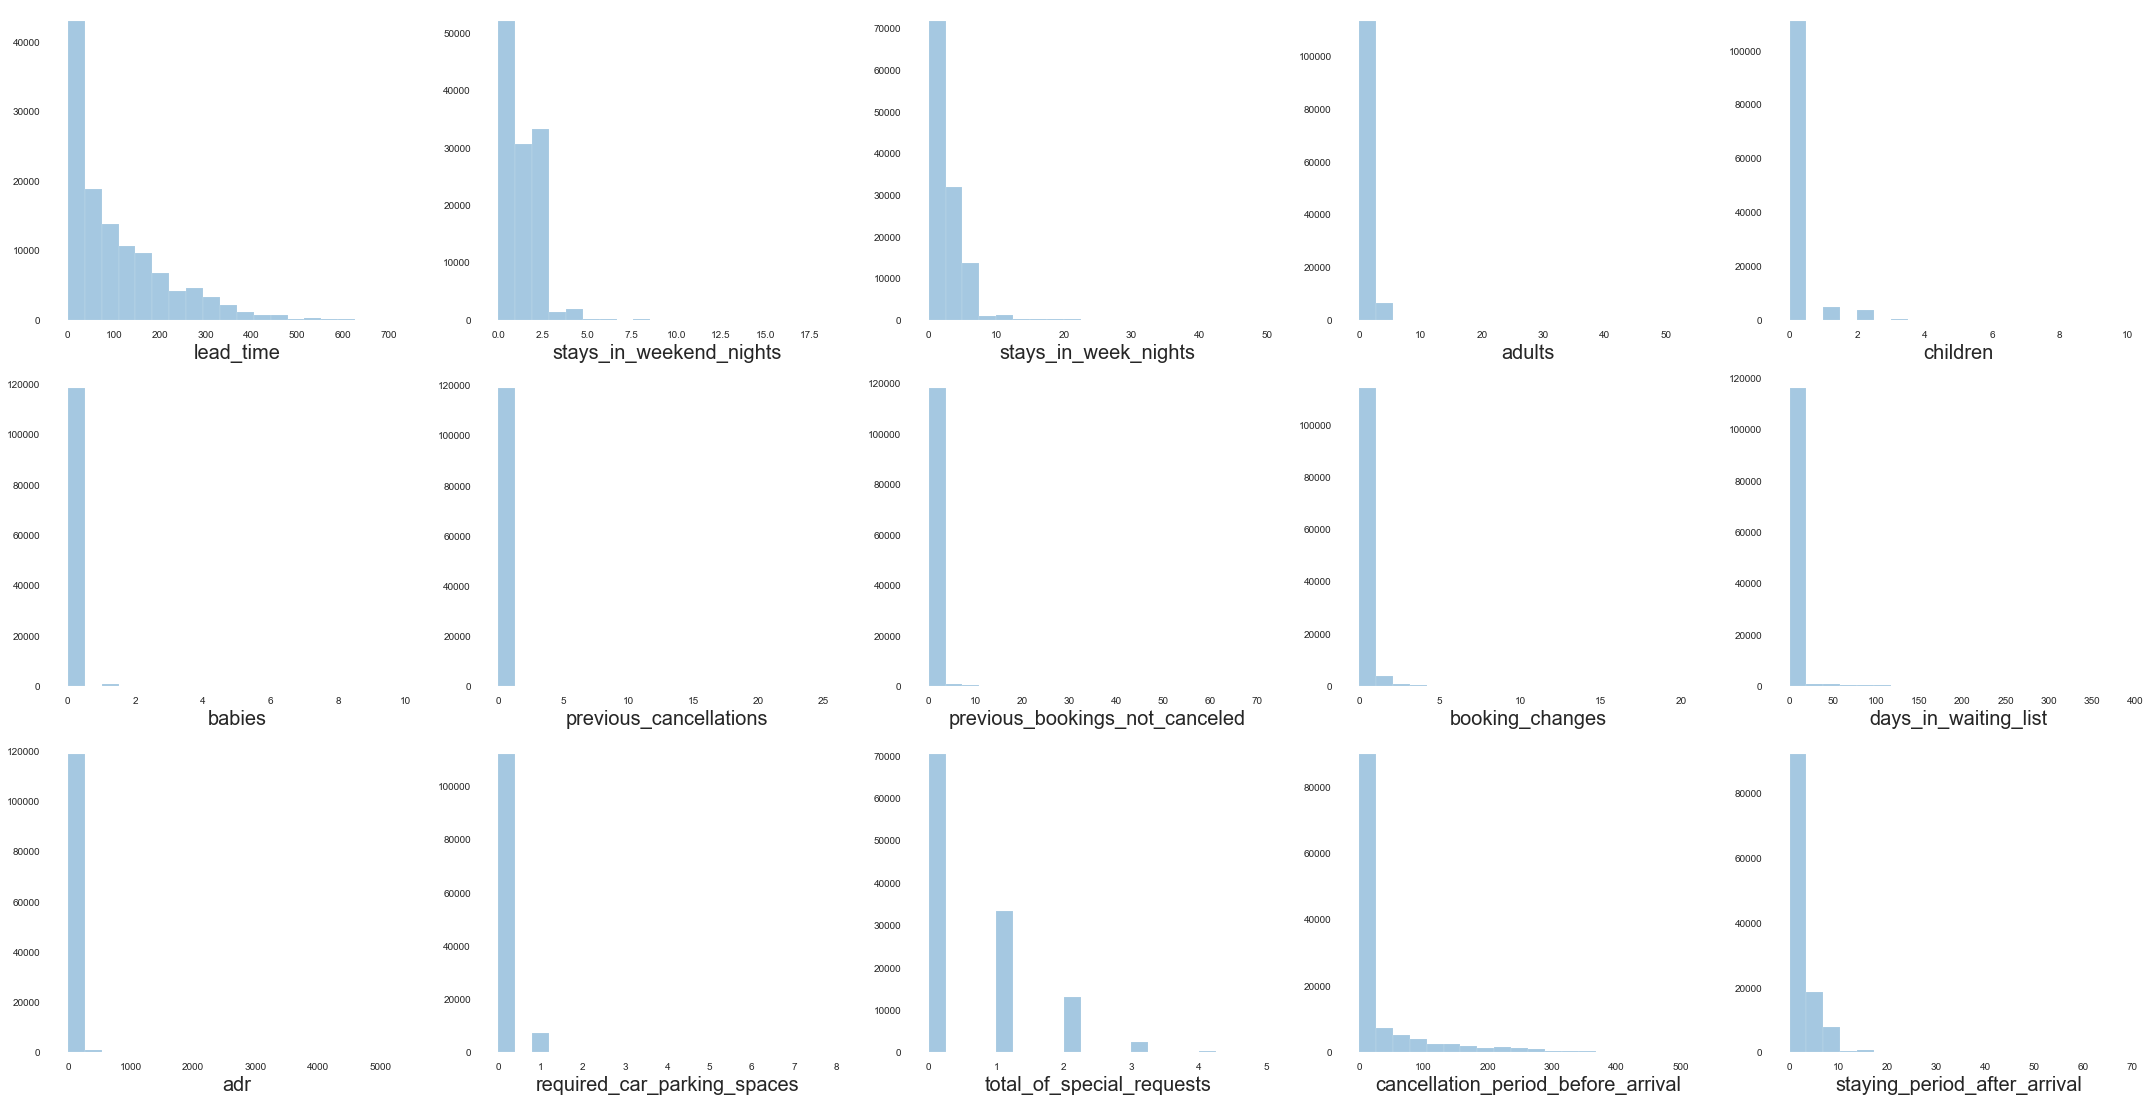

In [29]:
#Exploratory Data Analysys
#Univariate Exploratory Data Analysis

#Univariate EDA for numerical data with histogram

# let's see how data is distributed for every column
plt.figure(figsize=(30,25), facecolor='white')
plotnumber = 1

for column in data_numerical:
    if plotnumber<=30 :
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(data_numerical[column],kde=False,bins=20)
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

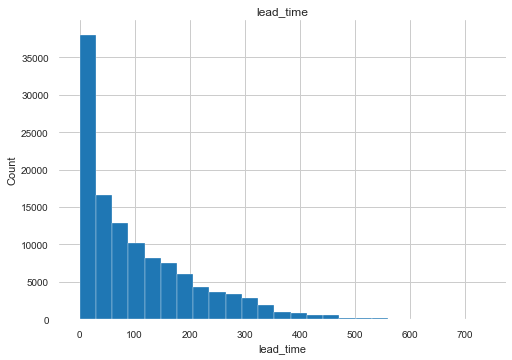

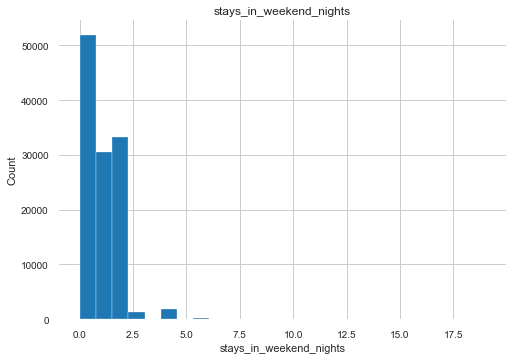

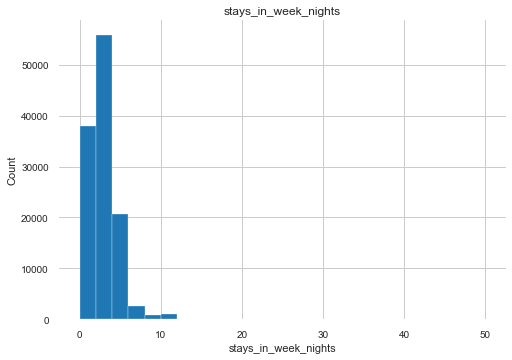

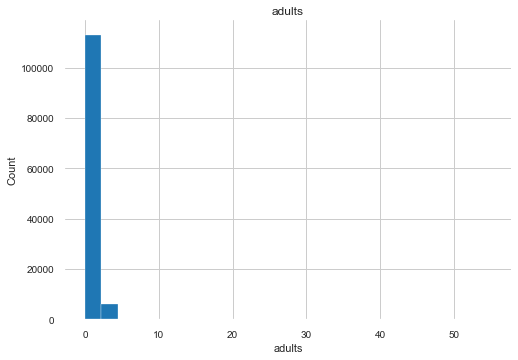

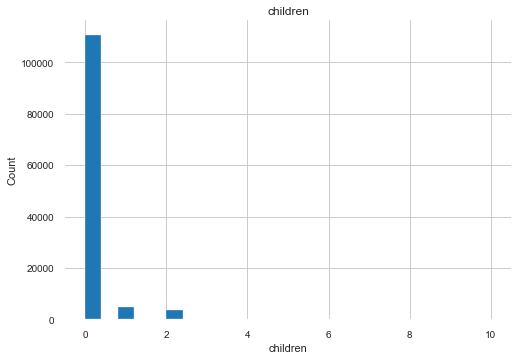

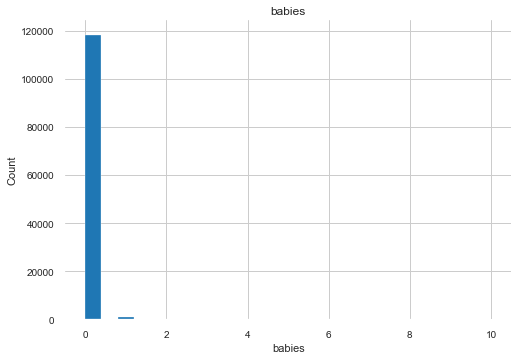

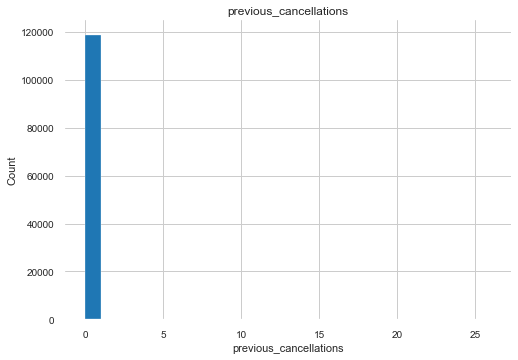

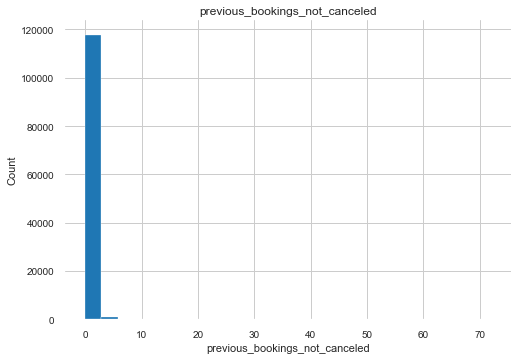

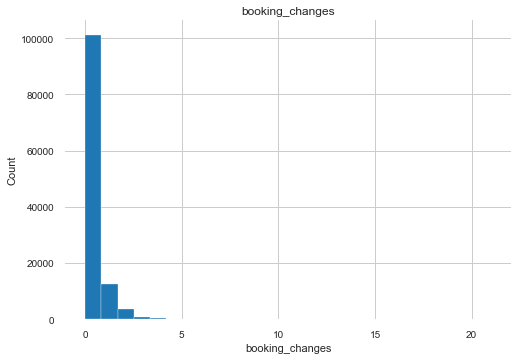

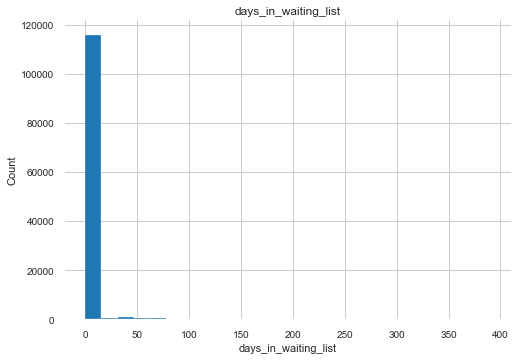

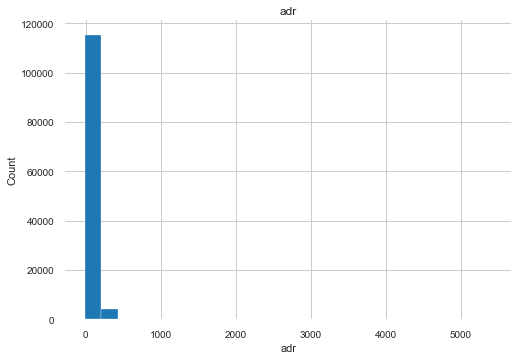

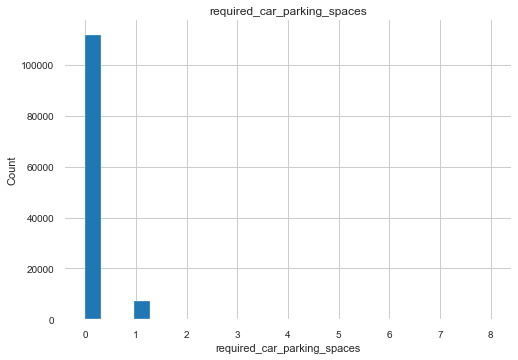

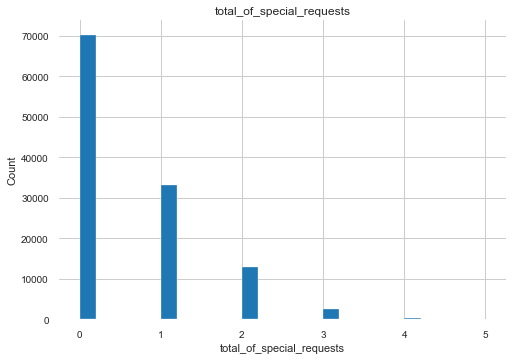

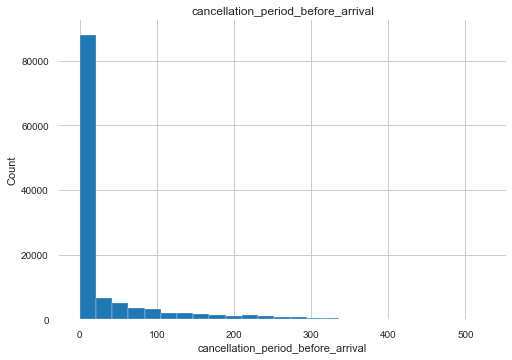

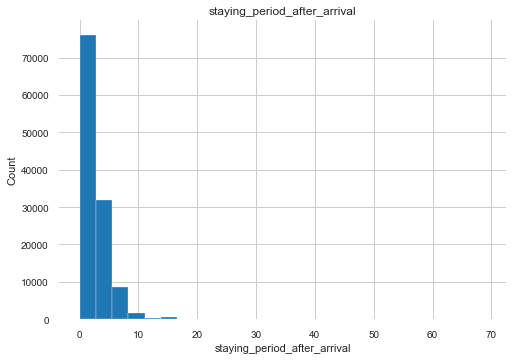

In [30]:
for feature in data_numerical:
    data_numerical[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [31]:
for feature in data_numerical:
    print(feature, '-' ,len(data_numerical[feature].unique()))

lead_time - 479
stays_in_weekend_nights - 17
stays_in_week_nights - 35
adults - 14
children - 6
babies - 5
previous_cancellations - 15
previous_bookings_not_canceled - 73
booking_changes - 21
days_in_waiting_list - 128
adr - 8879
required_car_parking_spaces - 5
total_of_special_requests - 6
cancellation_period_before_arrival - 391
staying_period_after_arrival - 43


In [32]:
#separting distict and continous numerical fetures
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in data_numerical 
                  if len(data_numerical[feature].unique())<15]

discrete_feature=data_numerical[discrete_feature]

###############################################
#Splitting the  Numerical features

continuous_feature=[feature for feature in data_numerical  
                    if feature not in discrete_feature]
continuous_feature=data_numerical [continuous_feature]

Name of variable- lead_time
Skewness - 1.3465498727254268


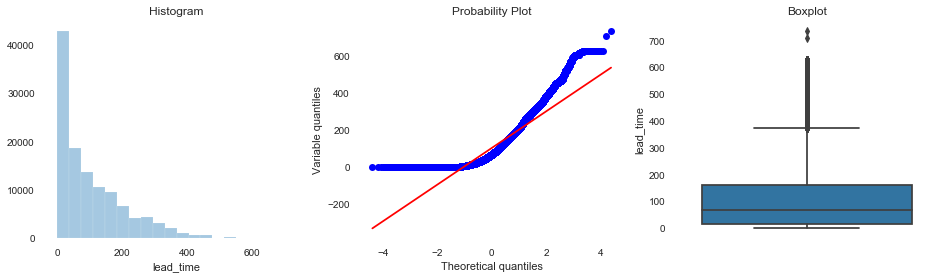

Name of variable- stays_in_weekend_nights
Skewness - 1.3800464497062852


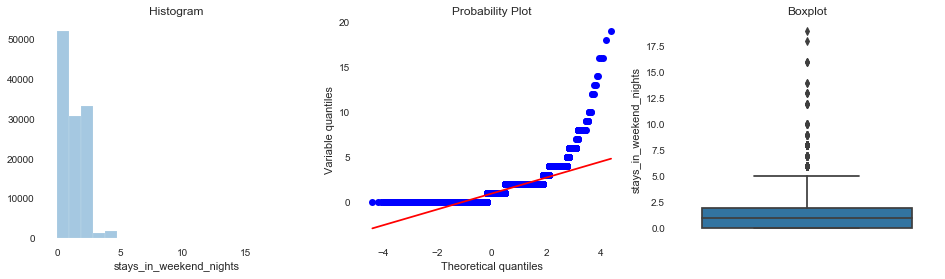

Name of variable- stays_in_week_nights
Skewness - 2.862249242067124


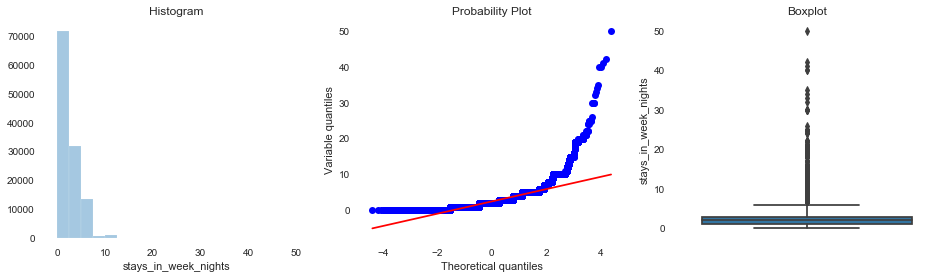

Name of variable- previous_cancellations
Skewness - 24.458048723119287


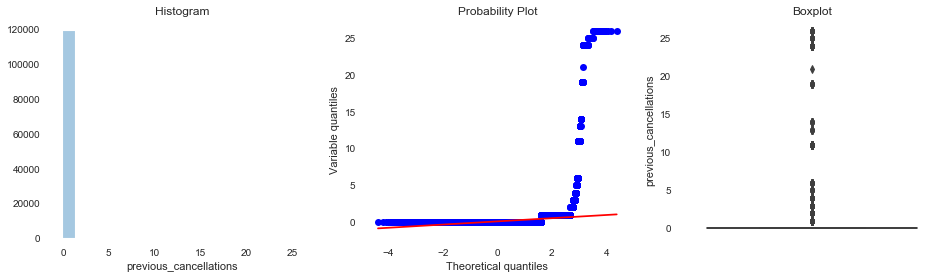

Name of variable- previous_bookings_not_canceled
Skewness - 23.53979995284346


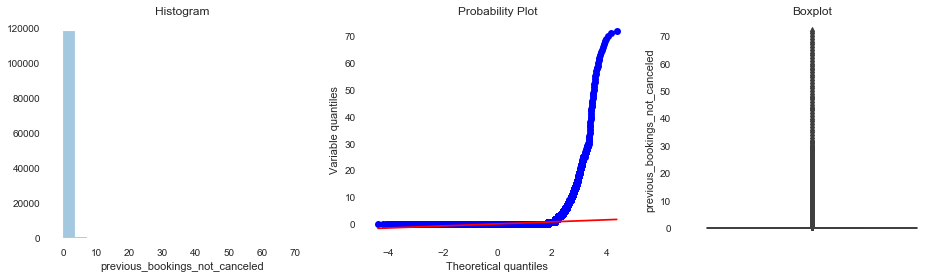

Name of variable- booking_changes
Skewness - 6.00027005440932


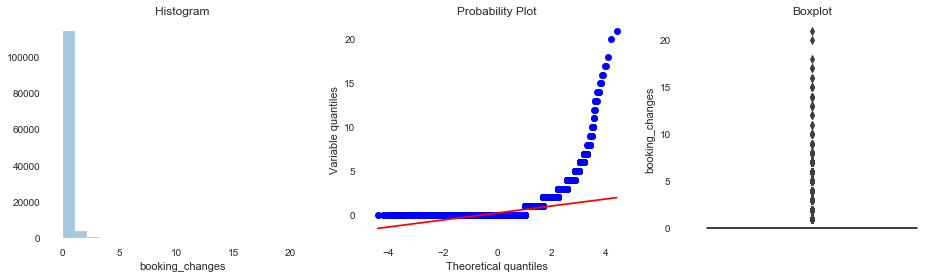

Name of variable- days_in_waiting_list
Skewness - 11.944353446438399


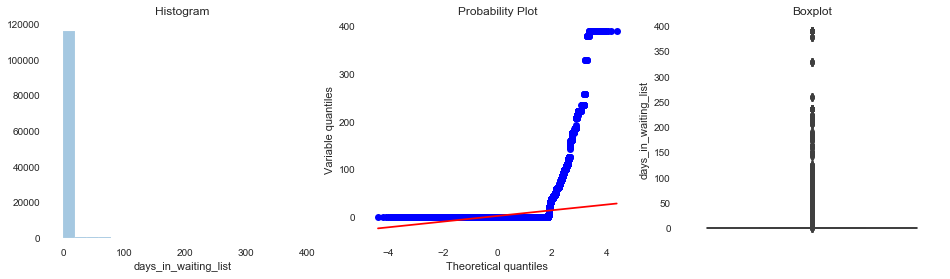

Name of variable- adr
Skewness - 10.53021398218952


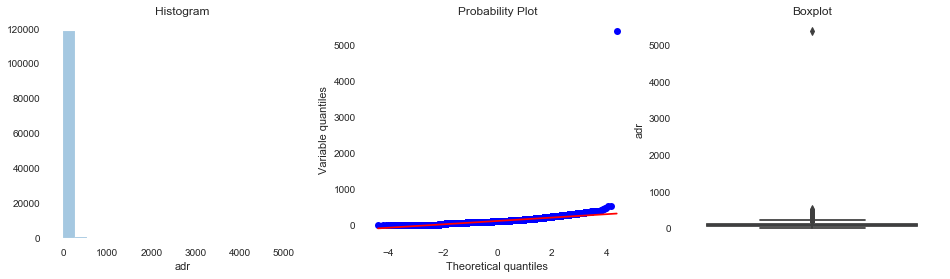

Name of variable- cancellation_period_before_arrival
Skewness - 2.8972179124885984


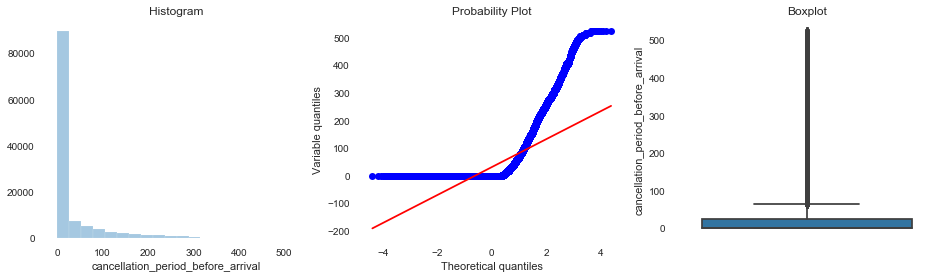

Name of variable- staying_period_after_arrival
Skewness - 2.6614274394561206


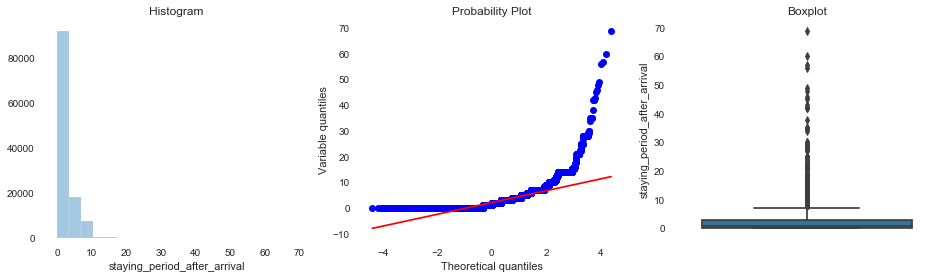

In [33]:
for variable in continuous_feature:
    print('Name of variable- %s'%variable)
    
    print('Skewness - %s'%continuous_feature[variable].skew())
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(continuous_feature[variable], bins=20,kde=False)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(continuous_feature[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=continuous_feature[variable])
    plt.title('Boxplot')

    plt.show()

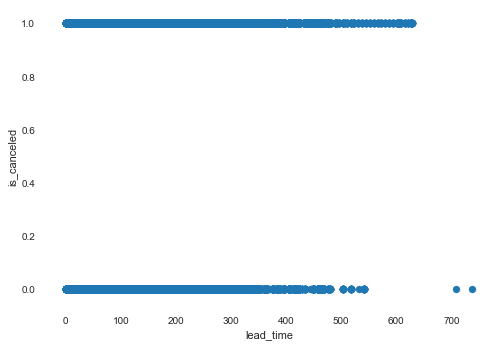

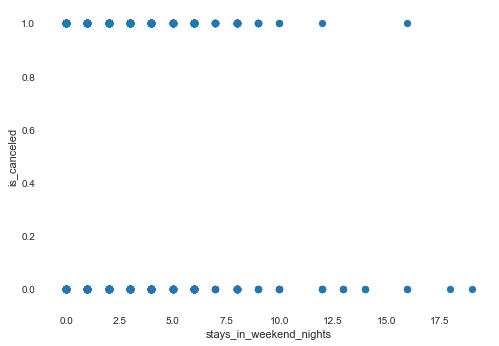

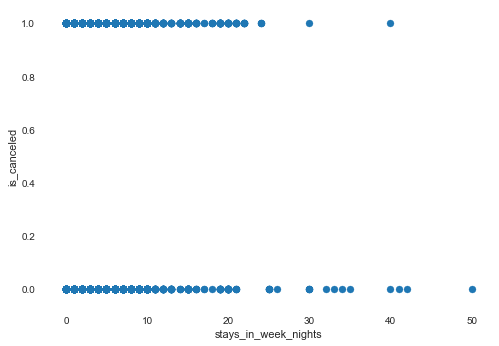

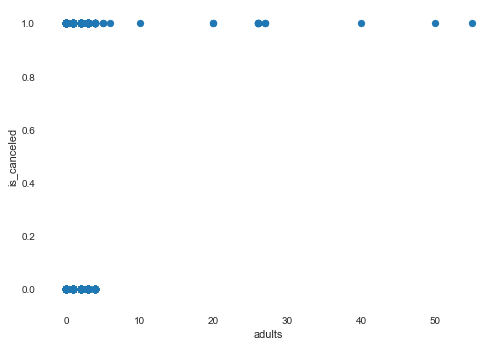

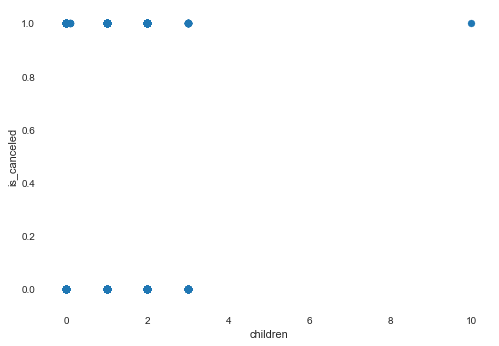

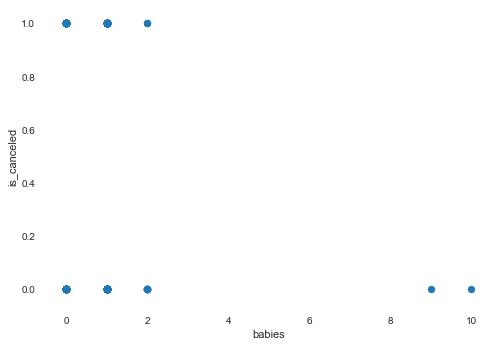

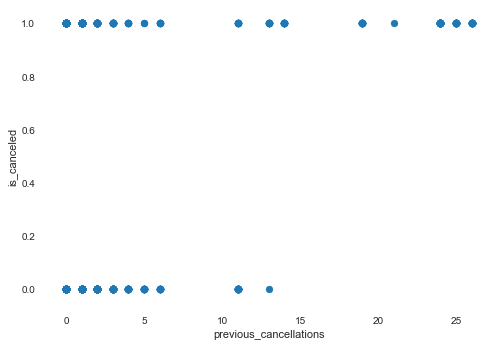

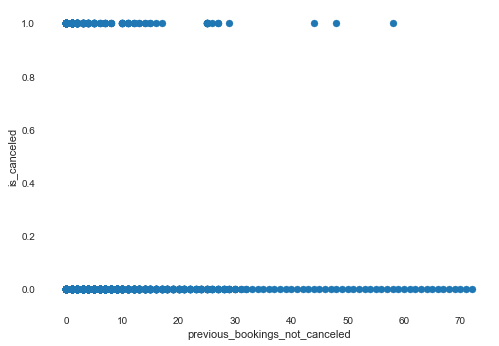

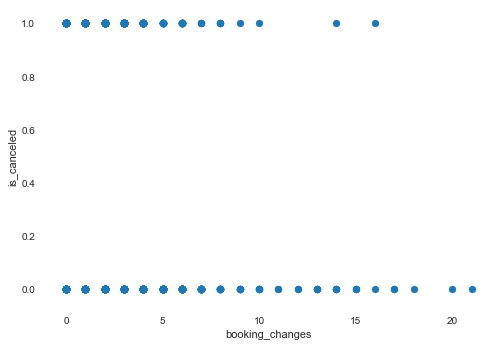

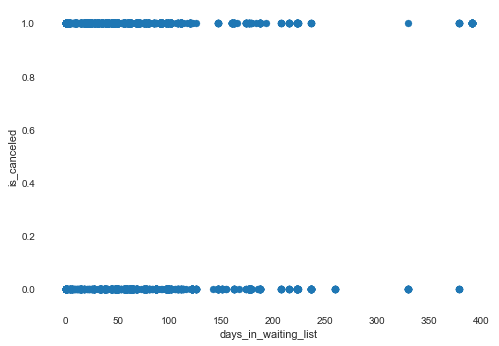

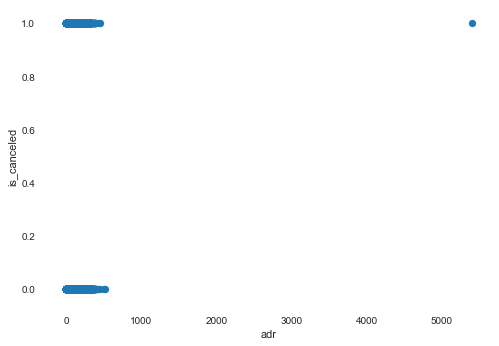

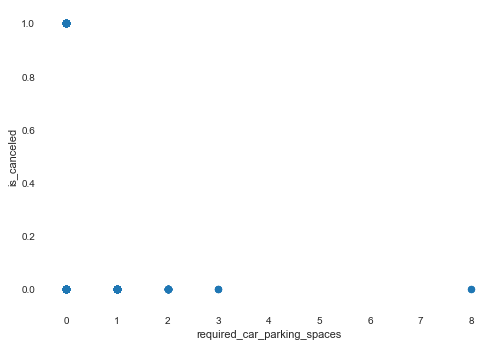

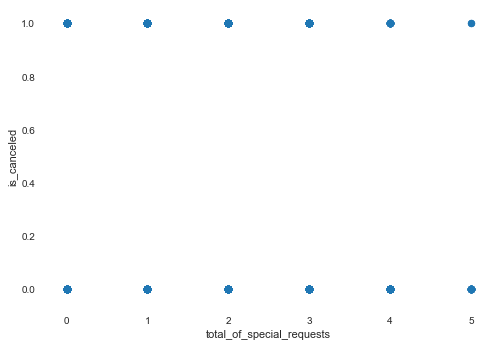

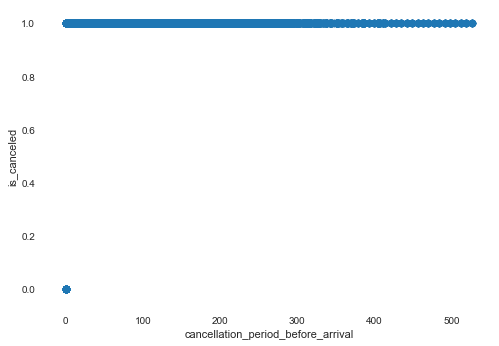

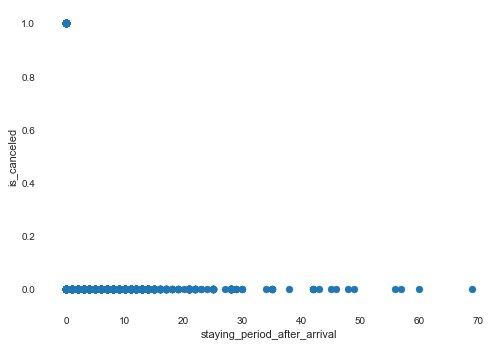

In [34]:
#Bivariate Analysis Between target variable and numerical fetures
for feature in data_numerical:
    plt.xlabel(feature)
    plt.ylabel('is_canceled')
    plt.scatter(data_numerical[feature],data_categorical['is_canceled'])
    plt.show()

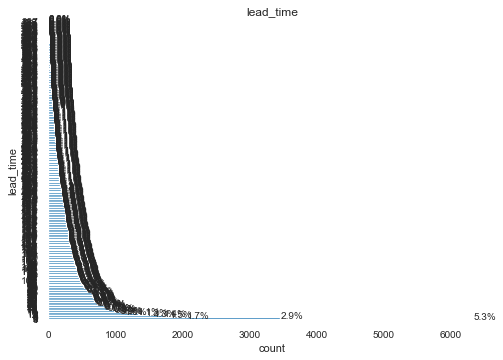

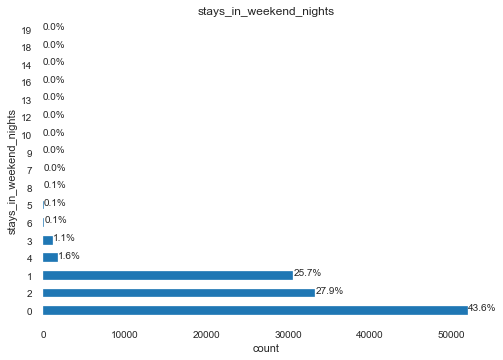

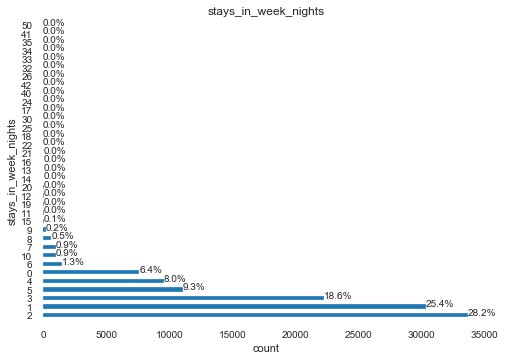

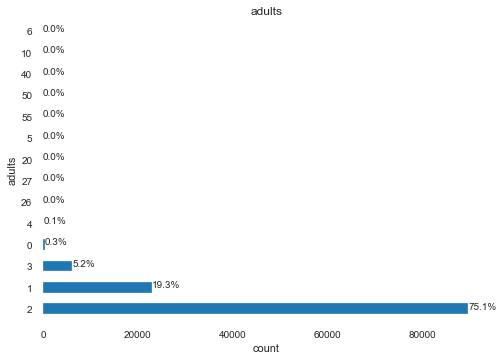

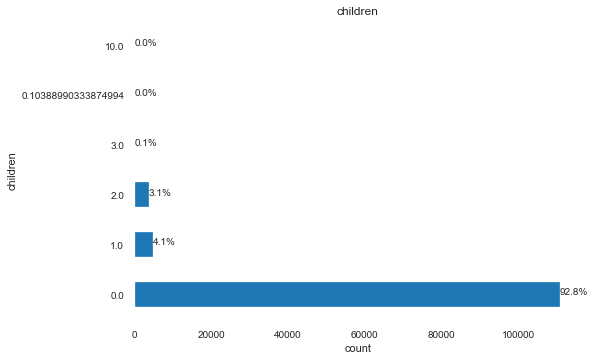

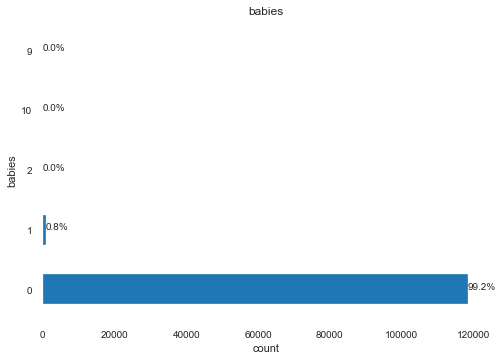

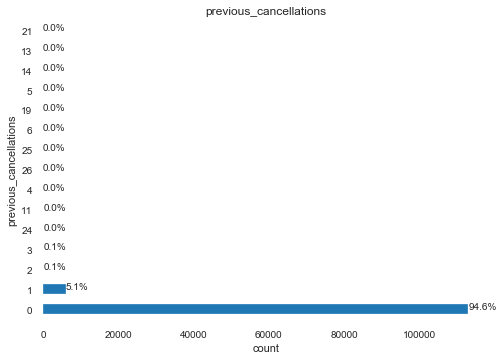

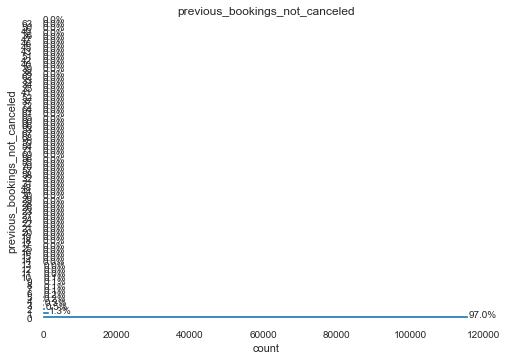

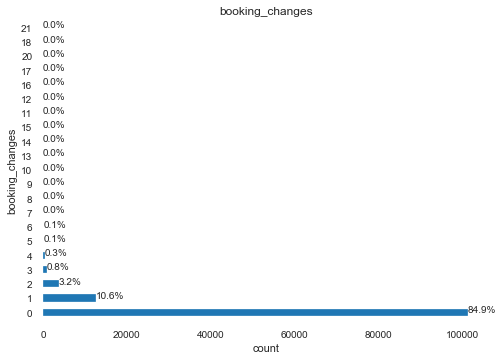

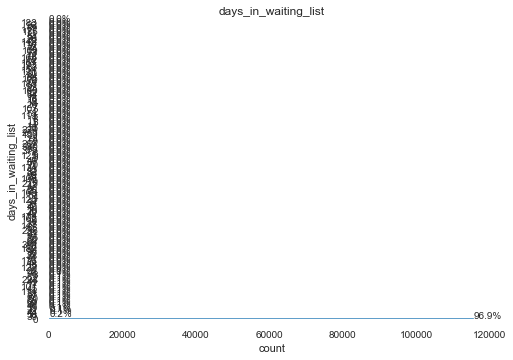

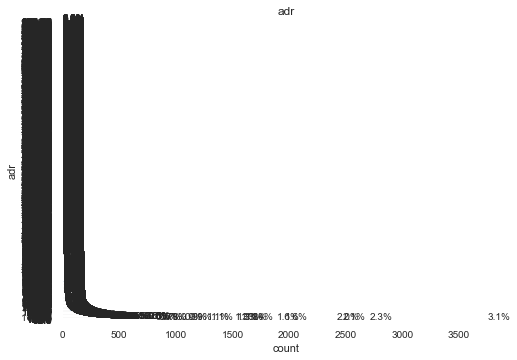

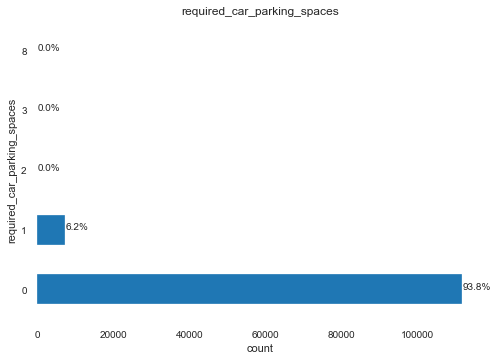

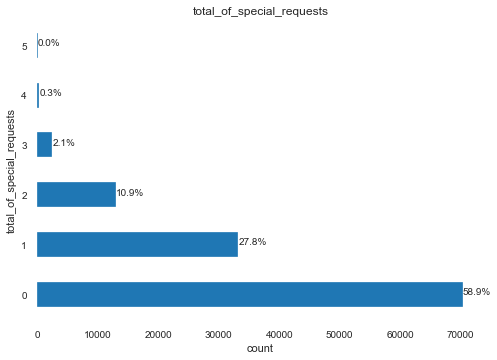

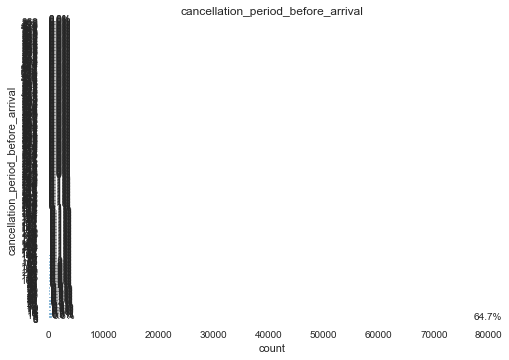

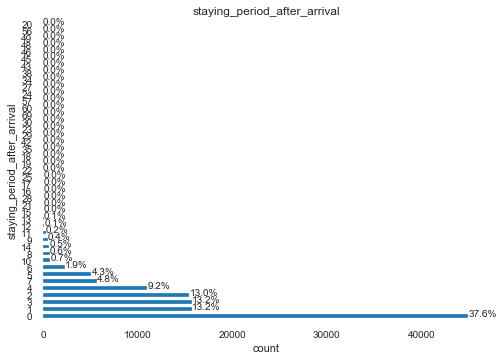

In [36]:
#Percentageweise distribution of discrete variable


for feature in data_numerical:
    ax=data_numerical[feature].value_counts().plot(kind='barh')
    plt.xlabel('count')
    plt.ylabel(feature)
    plt.title(feature)
   
    total = len(data_numerical[feature])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
    plt.show()

In [37]:
#EDA for categorical variables
data_categorical.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'customer_type',
       'reservation_status_day_of_month', 'reservation_status_month',
       'reservation_status_year'],
      dtype='object')

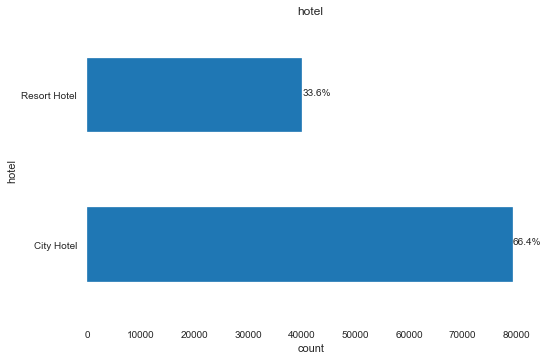

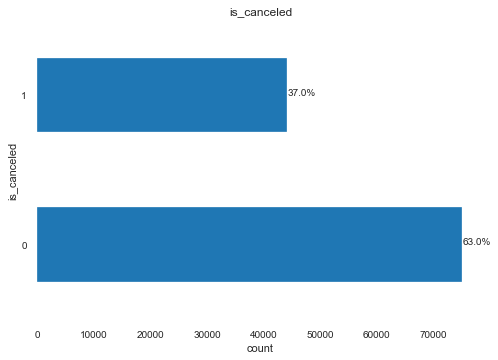

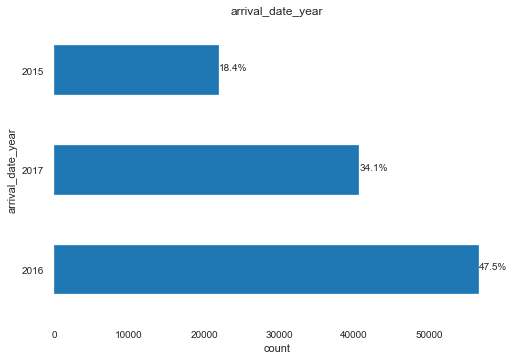

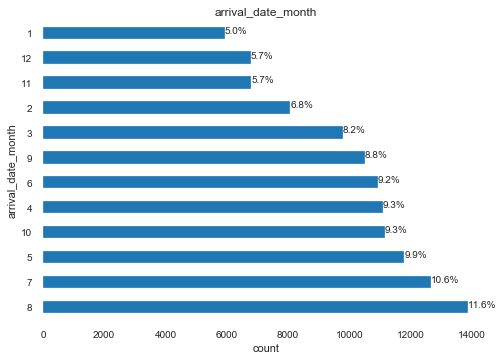

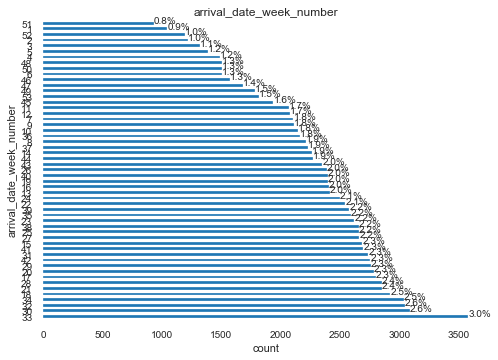

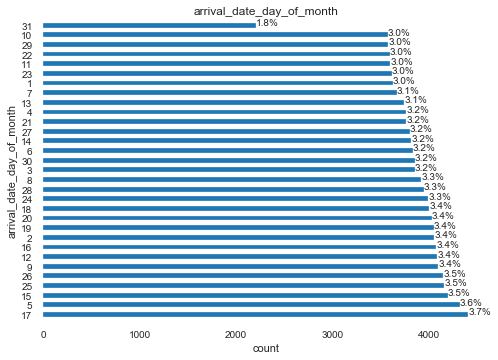

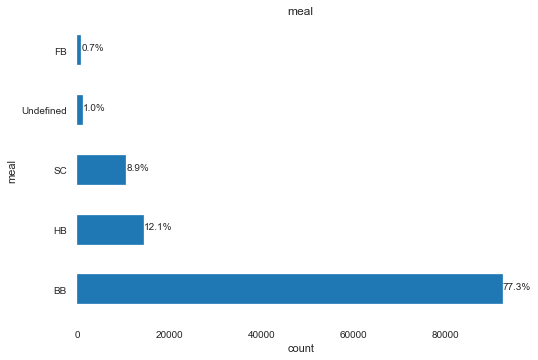

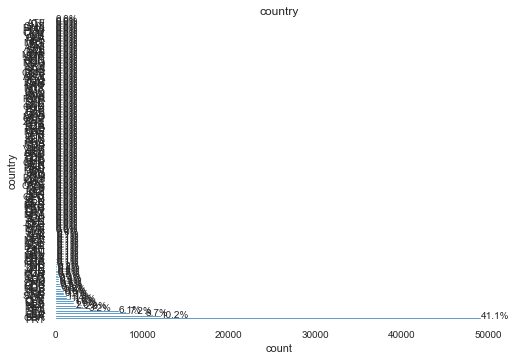

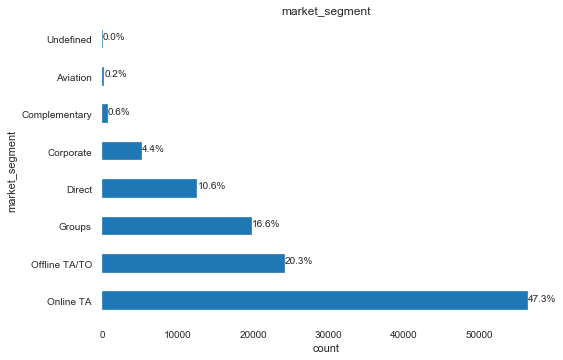

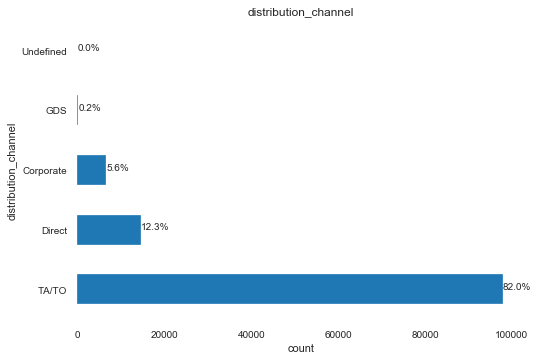

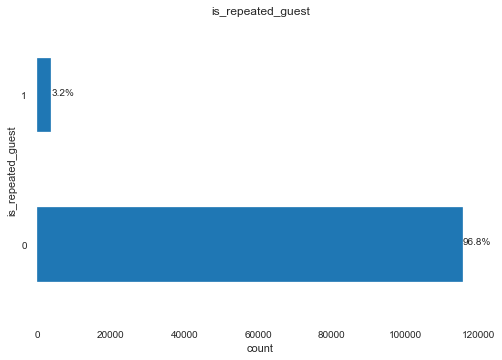

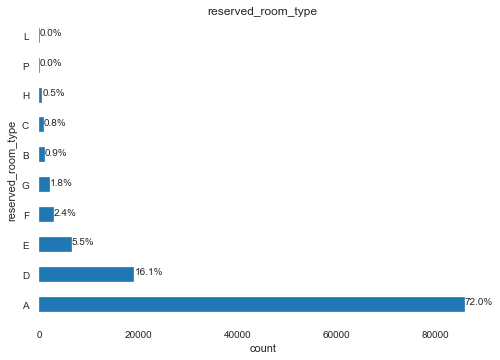

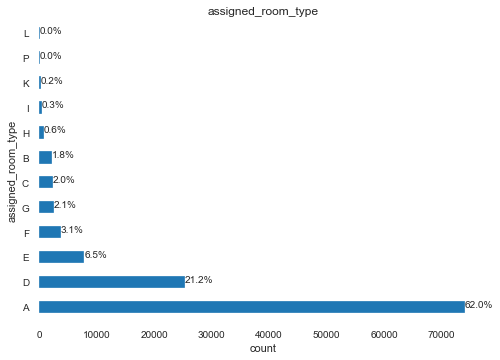

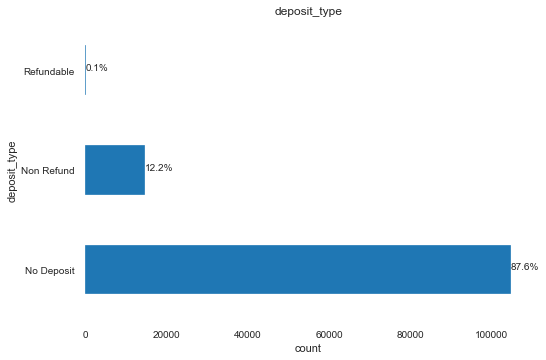

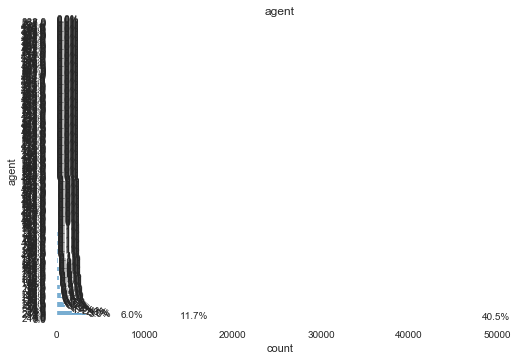

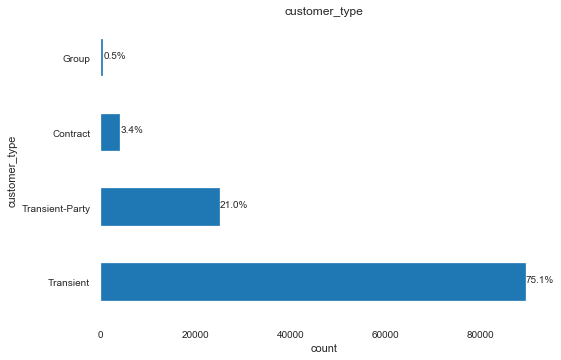

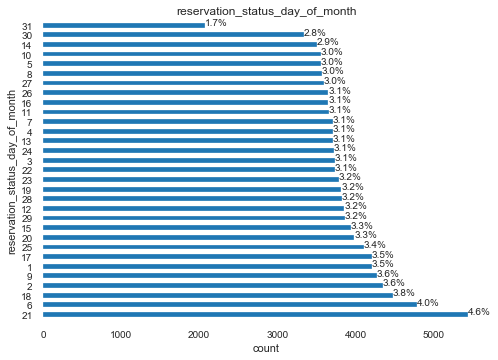

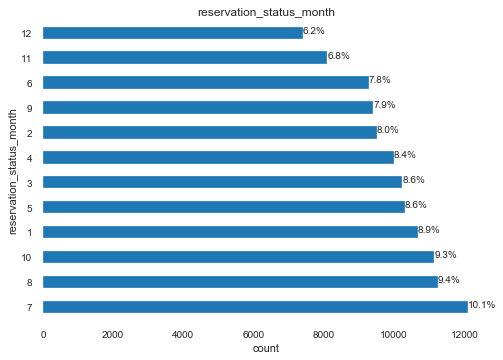

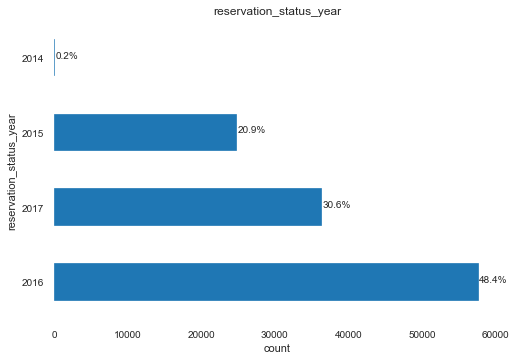

In [38]:
#Univariate Barplots for all the columns


for feature in data_categorical:
    ax=data_categorical[feature].value_counts().plot(kind='barh')
    plt.xlabel('count')
    plt.ylabel(feature)
    plt.title(feature)
   
    total = len(data_categorical[feature])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
    plt.show()


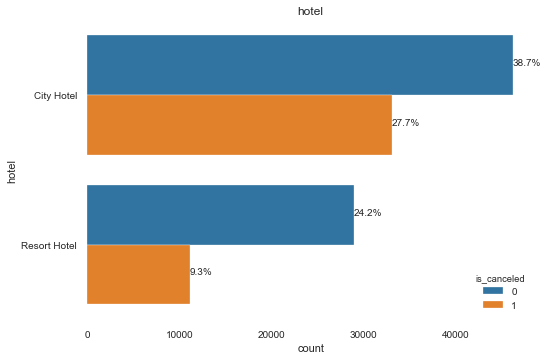

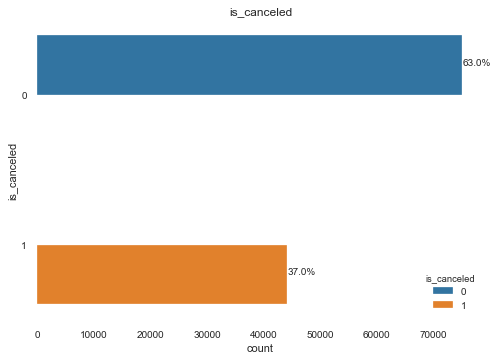

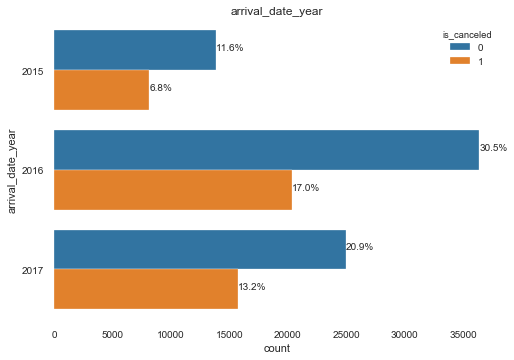

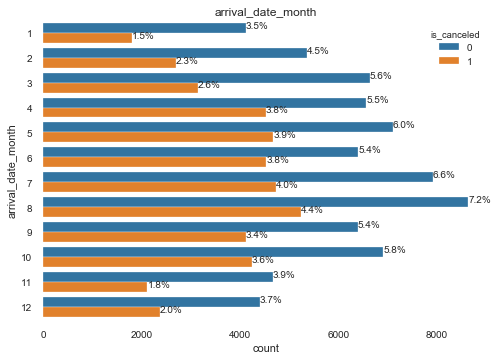

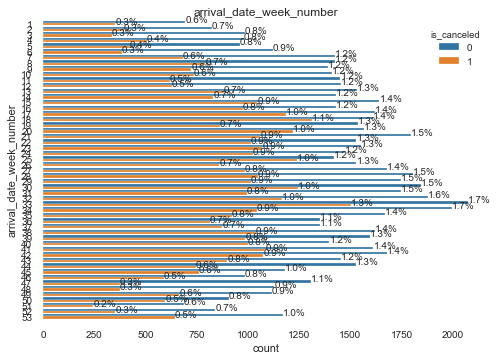

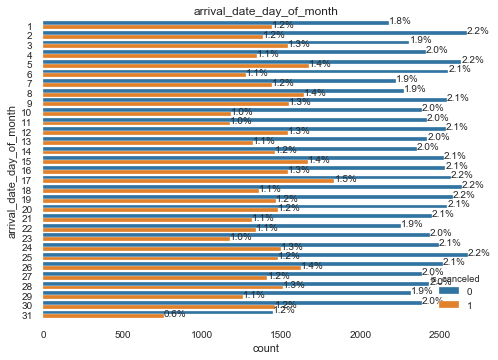

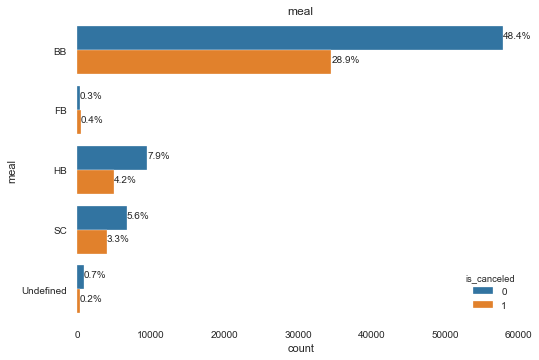

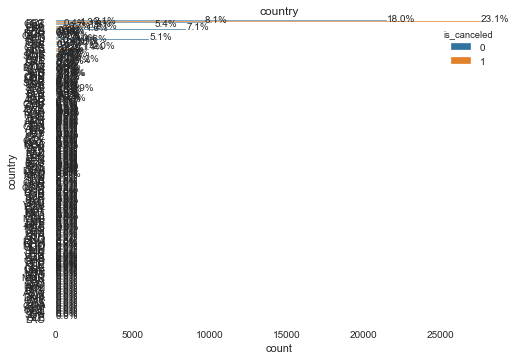

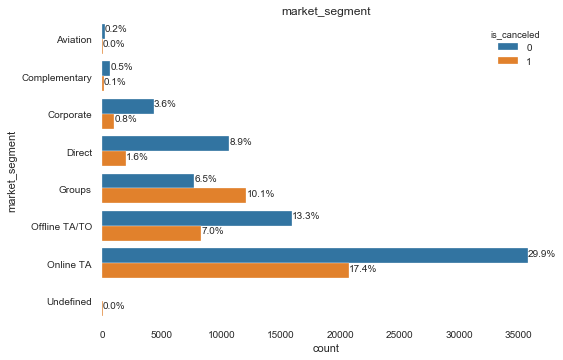

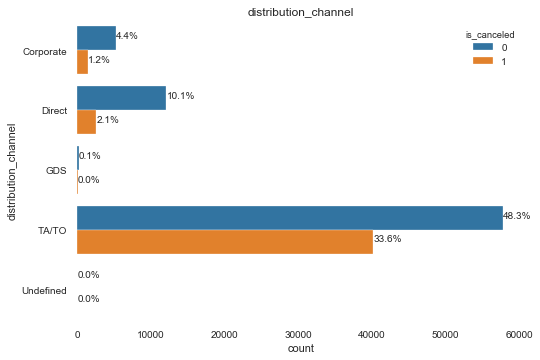

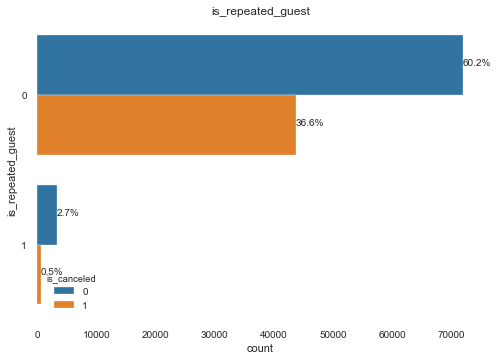

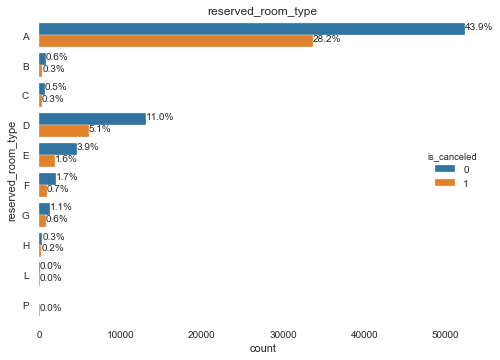

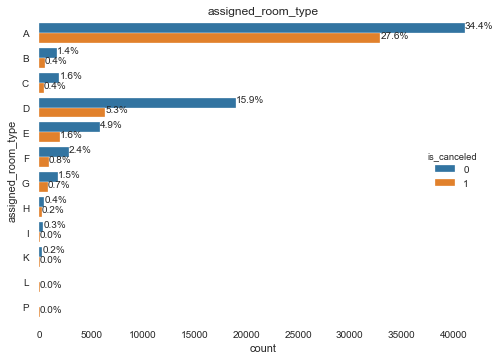

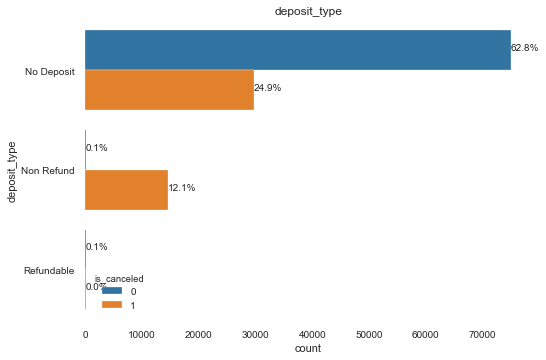

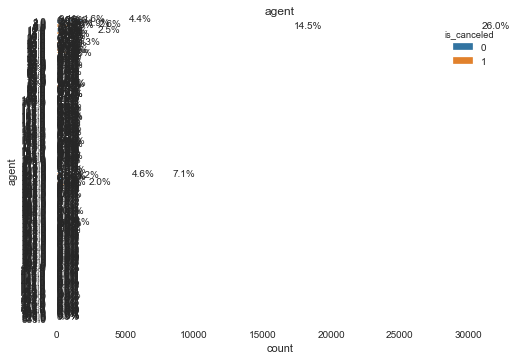

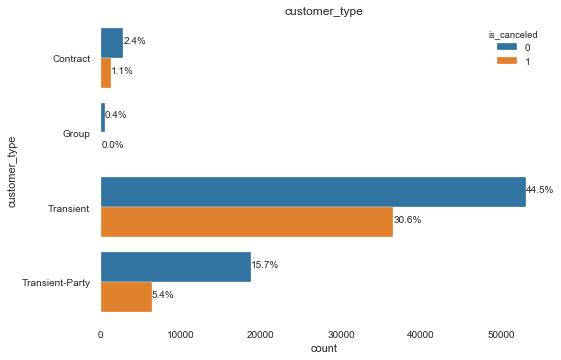

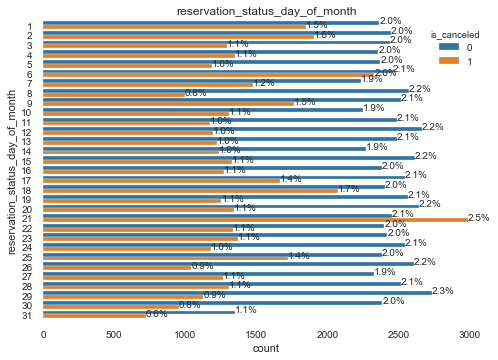

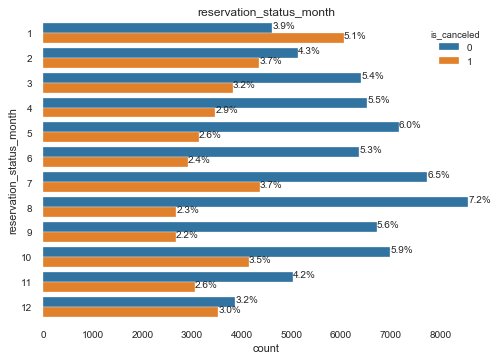

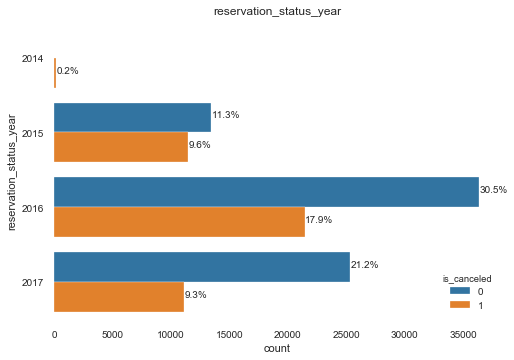

In [39]:
#Univariate Barplots for all the columns
#Distribution of all categorical variables

for feature in data_categorical:
    ax=sns.countplot(y=data_categorical[feature],data=data_categorical,hue='is_canceled')
    plt.xlabel('count')
    plt.ylabel(feature)
    plt.title(feature)
   
    total = len(data_categorical[feature])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
    plt.show()


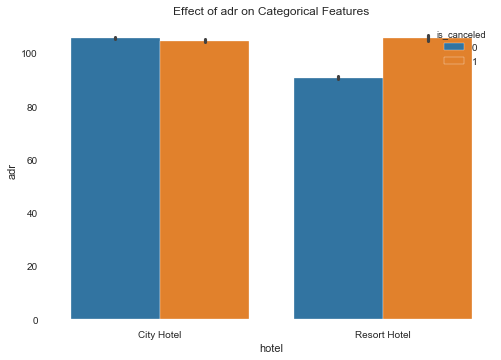

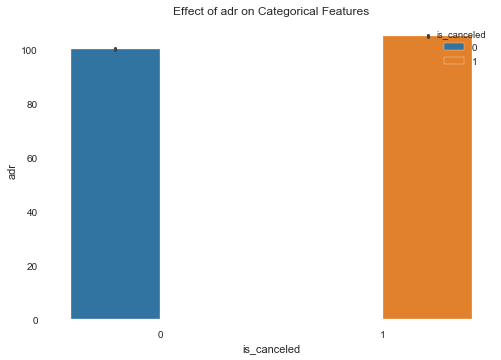

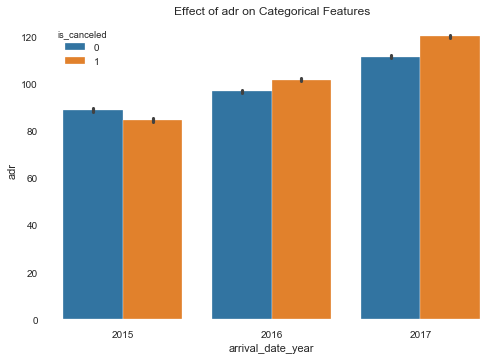

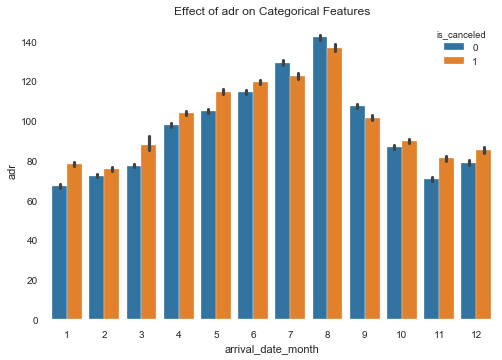

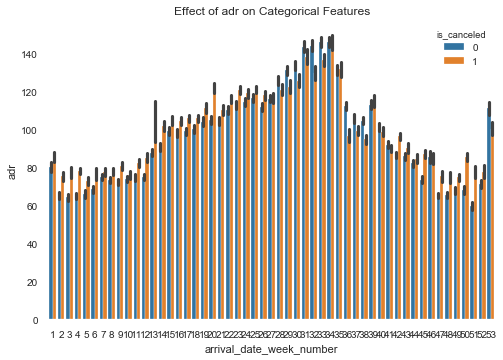

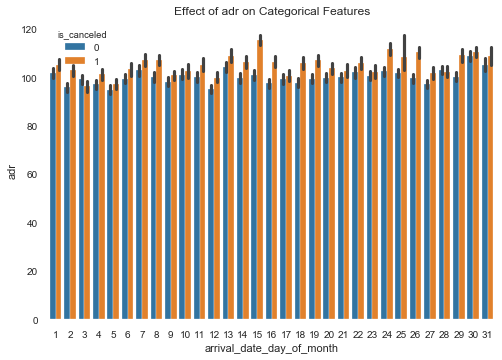

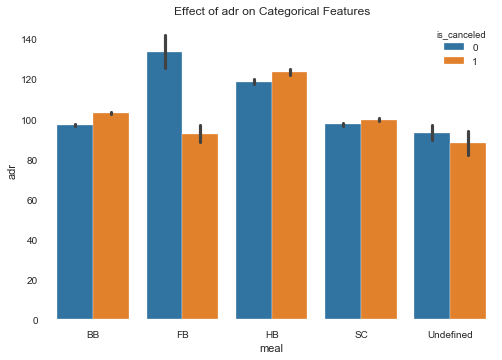

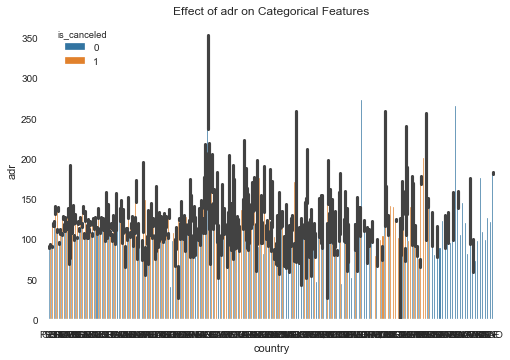

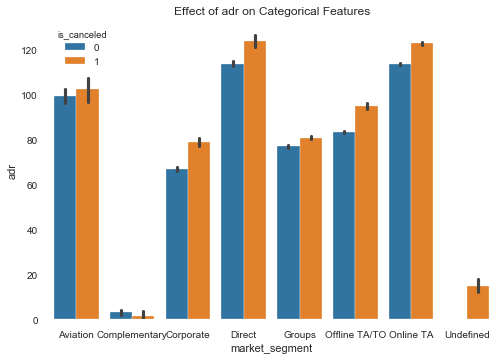

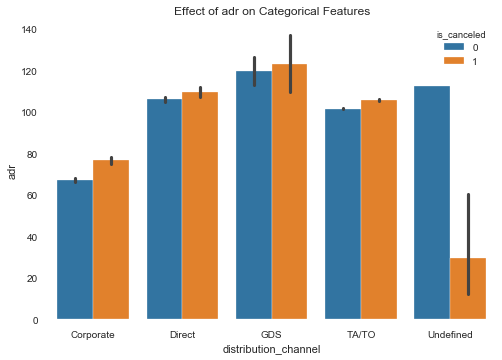

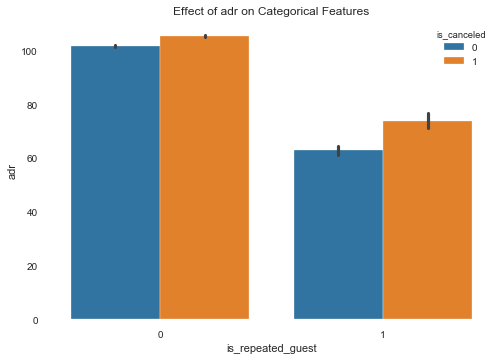

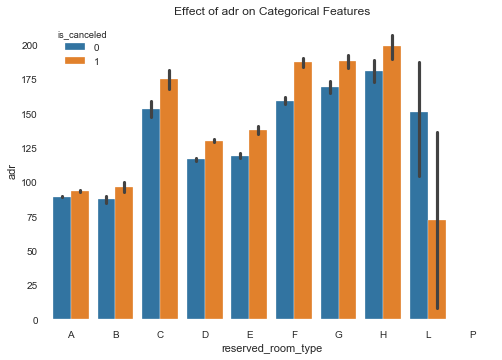

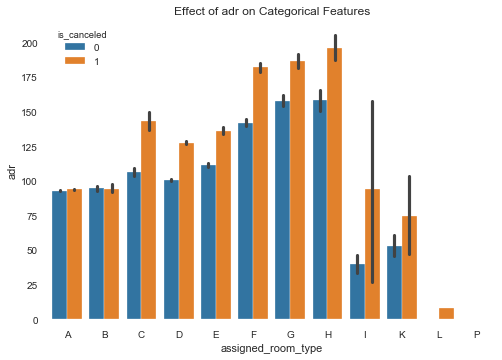

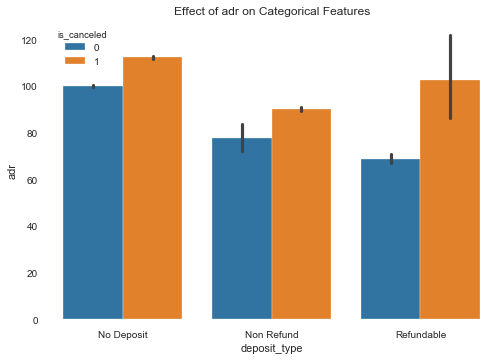

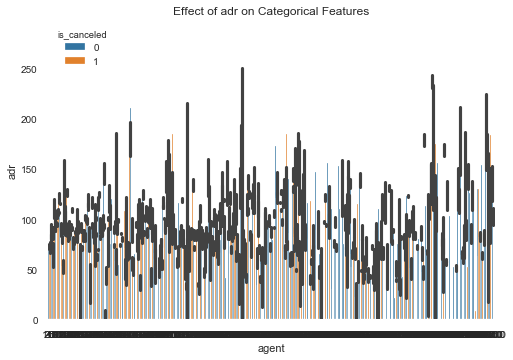

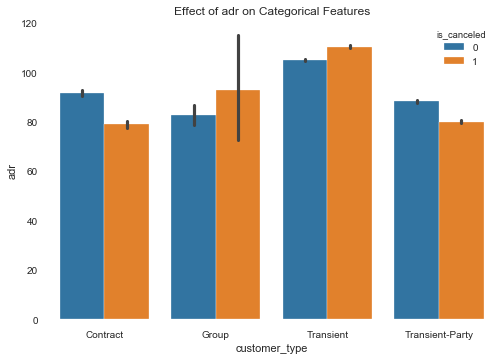

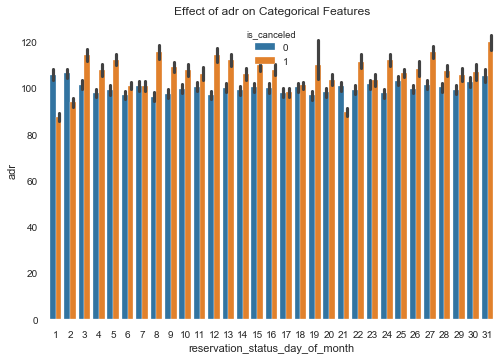

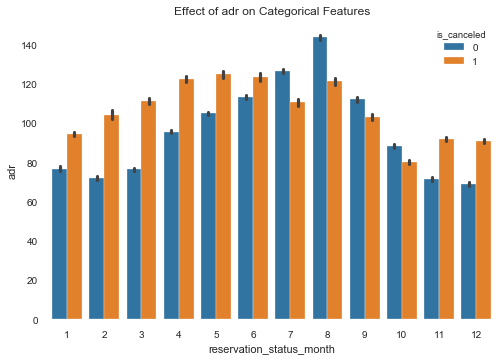

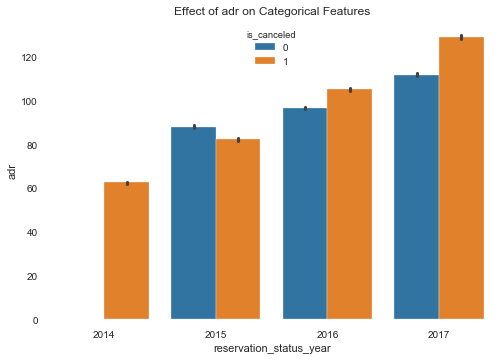

In [40]:
#Bivariate bar plot
#Relation with numerical and categorical variables
for feature in data_categorical:
    ax=sns.barplot(y=data_numerical['adr'],x=data_categorical[feature],data=data_categorical,hue='is_canceled')
    plt.xlabel(feature)
    plt.ylabel('adr')
    plt.title('Effect of adr on Categorical Features')

        
    plt.show()


In [41]:
data_numerical.columns

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'cancellation_period_before_arrival',
       'staying_period_after_arrival'],
      dtype='object')

In [42]:
data_categorical.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'customer_type',
       'reservation_status_day_of_month', 'reservation_status_month',
       'reservation_status_year'],
      dtype='object')

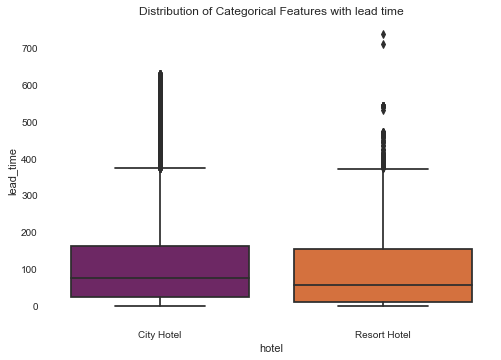

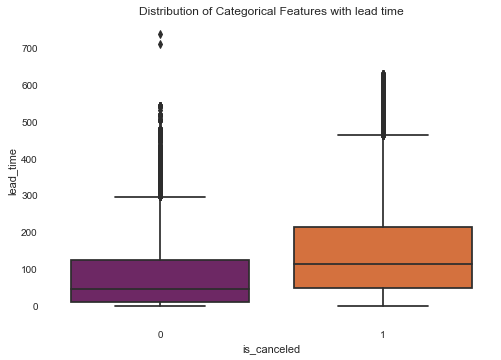

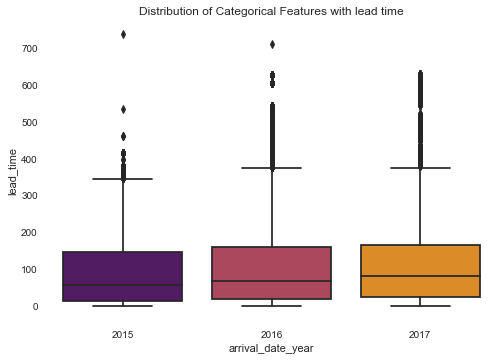

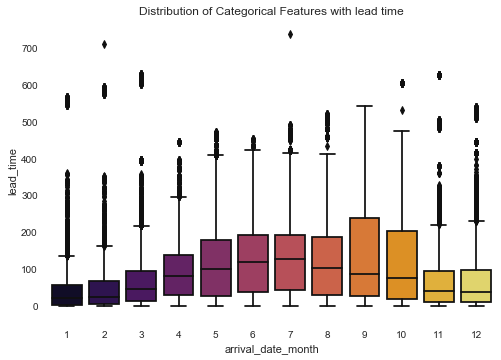

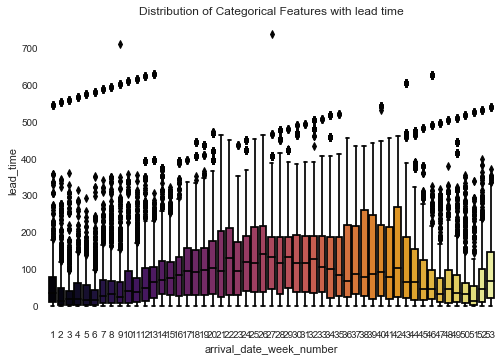

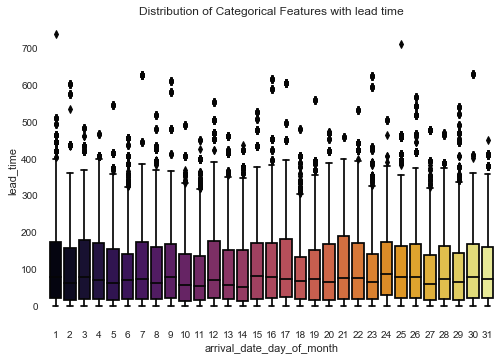

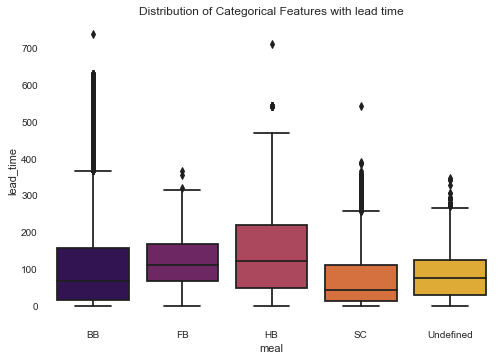

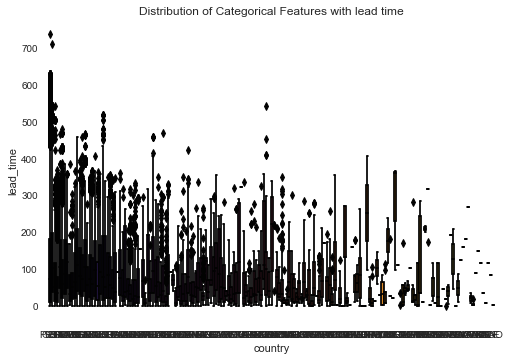

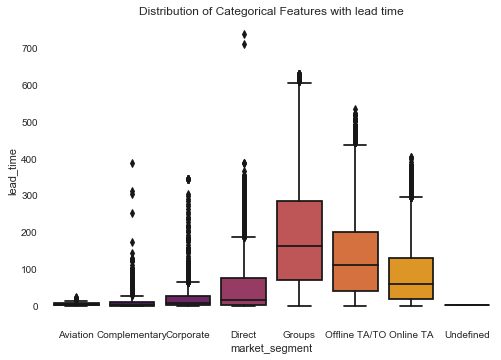

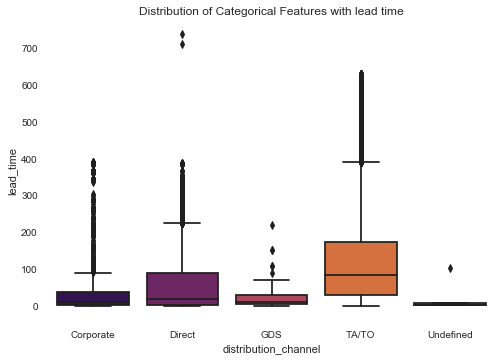

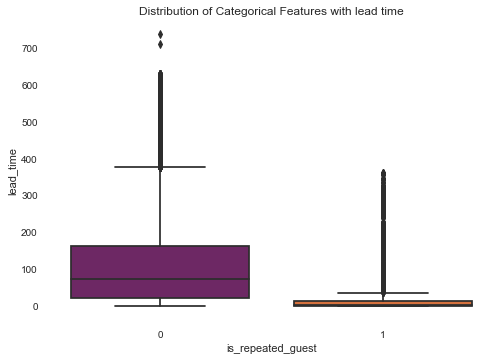

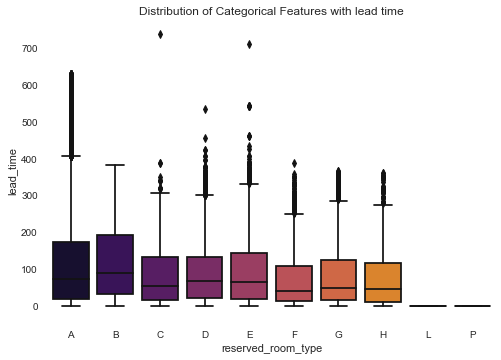

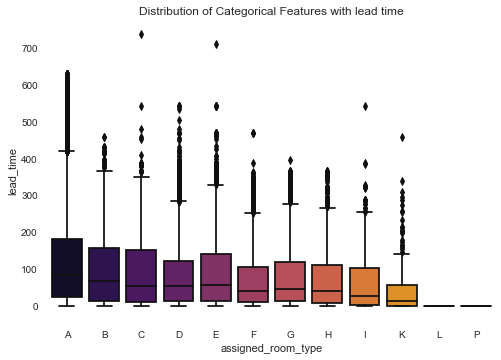

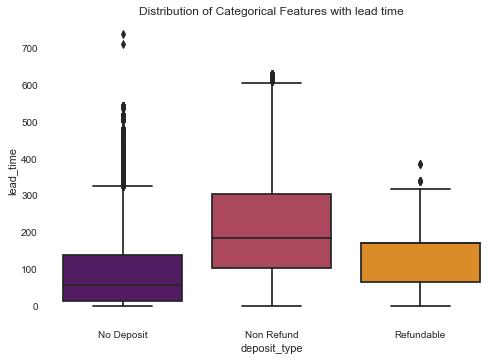

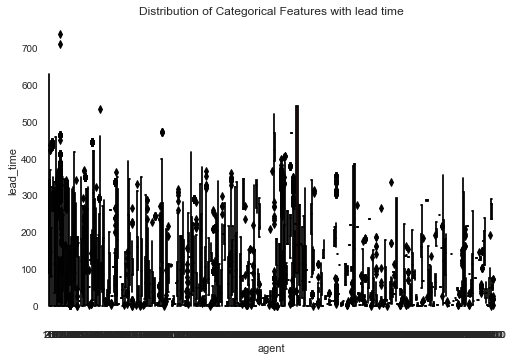

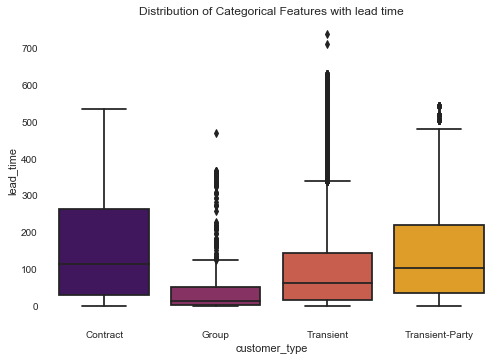

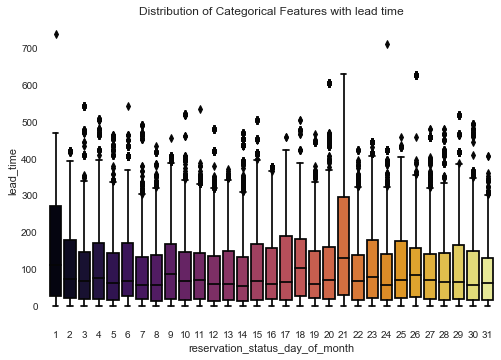

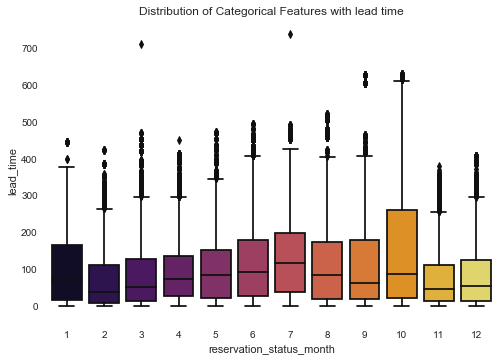

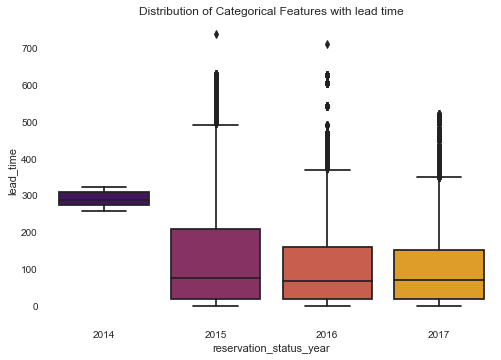

In [43]:
for feature in data_categorical:
    ax = sns.boxplot(y = data_numerical['lead_time'], x = data_categorical[feature], palette = 'inferno')
    plt.xlabel(feature)
    plt.ylabel('lead_time')
    plt.title('Distribution of Categorical Features with lead time')

        
    plt.show()


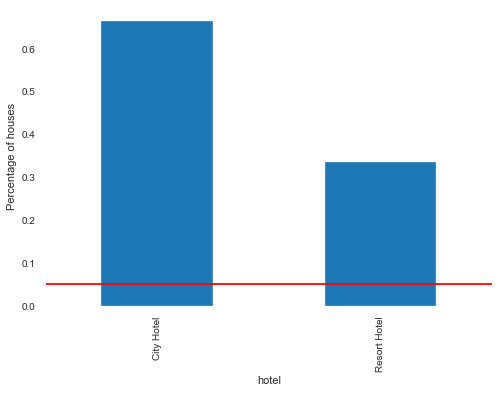

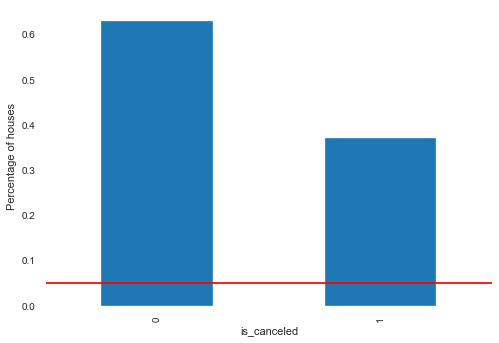

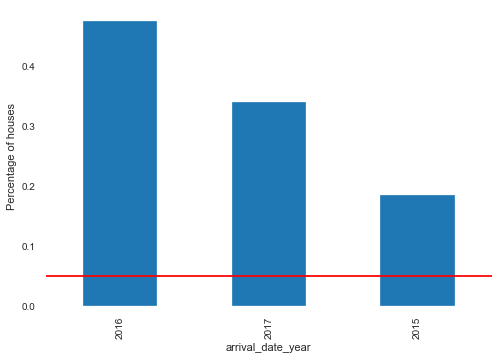

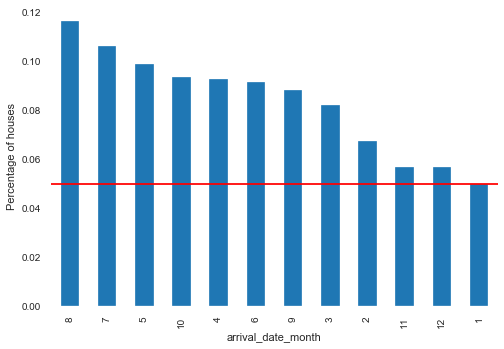

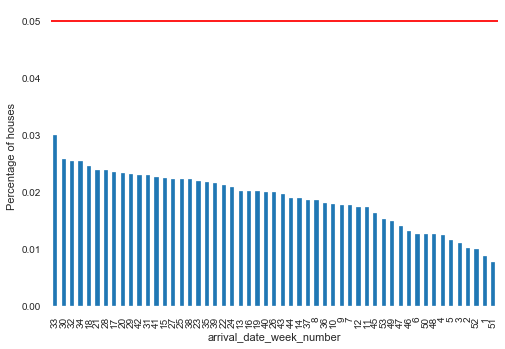

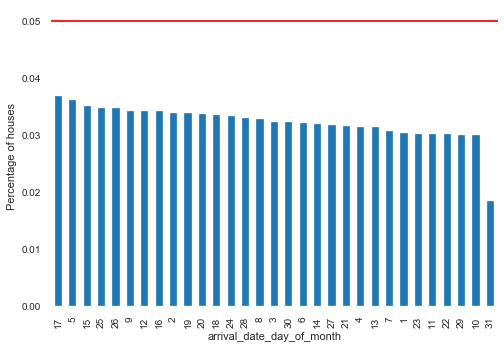

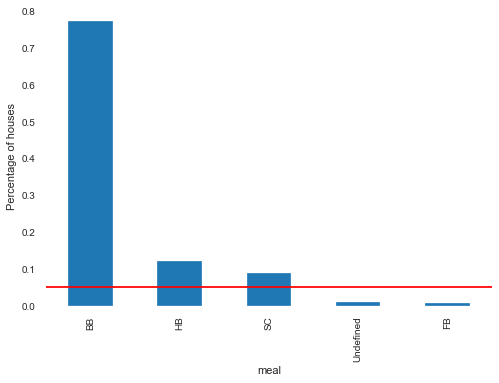

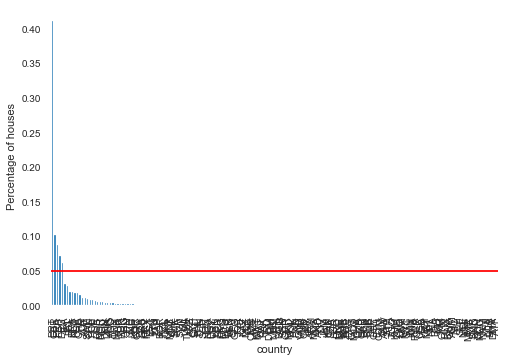

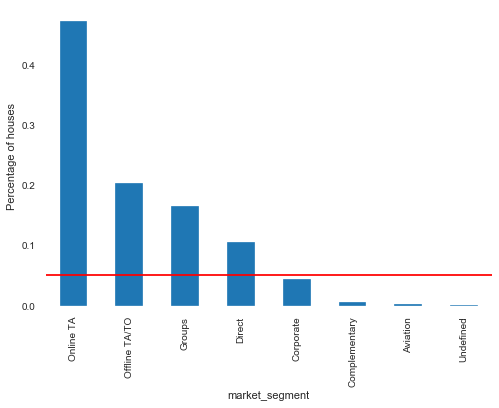

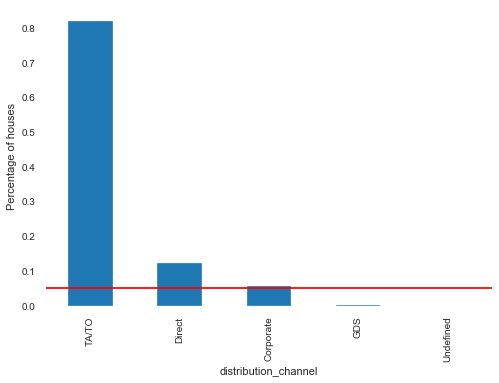

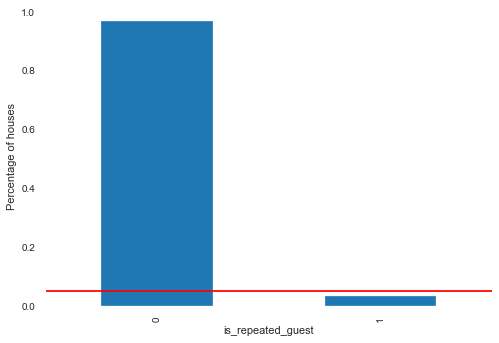

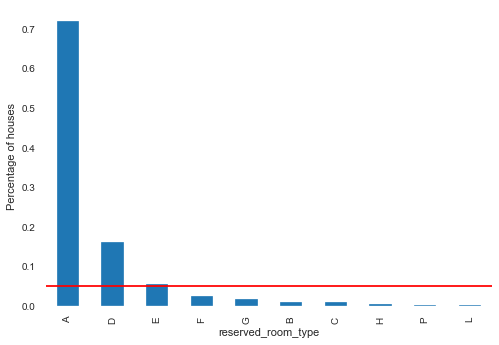

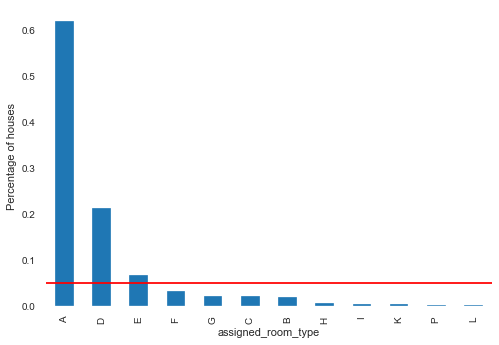

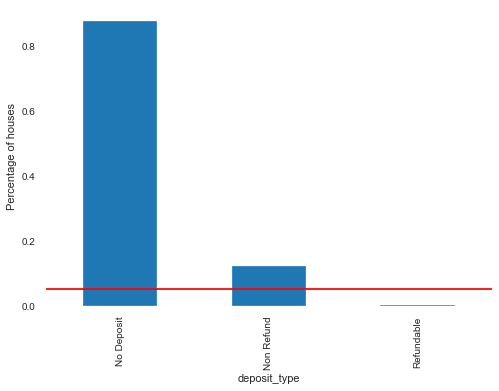

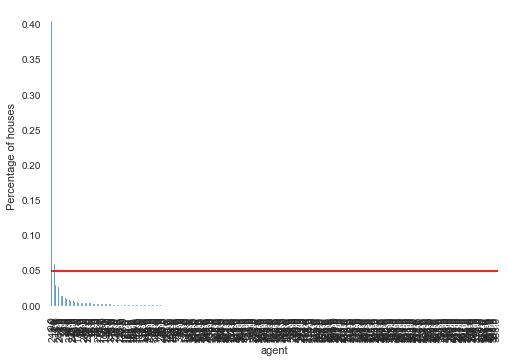

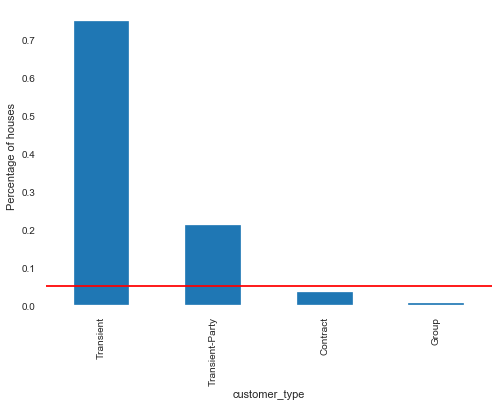

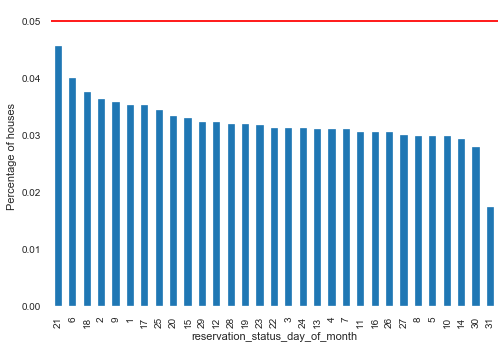

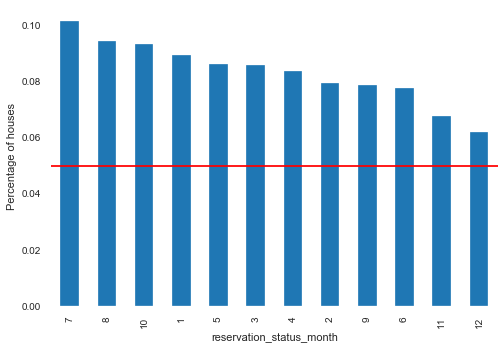

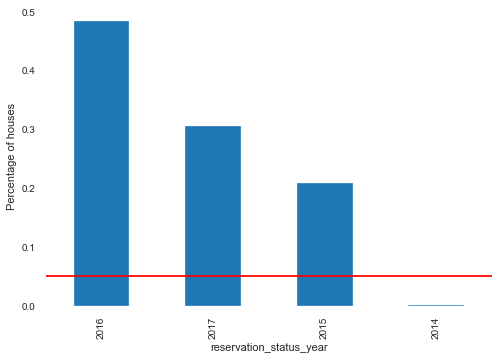

In [45]:
#Identifying Rare Labels
# let's plot how frequently each label
# appears in the dataset

# in other words, the percentage of houses in the data
# with each label

total = len(data_categorical)

# for each categorical variable
for col in data_categorical:

    # count the number of houses per category
    # and divide by total houses

    # aka percentage of houses per category

    temp_df = pd.Series(data_categorical[col].value_counts() / total)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

In [46]:
data_categorical.drop(columns=['reservation_status_day_of_month','arrival_date_day_of_month',
                               'arrival_date_week_number'],inplace=True)

C:\Users\PKK\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
data_categorical.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'customer_type', 'reservation_status_month',
       'reservation_status_year'],
      dtype='object')

In [48]:
# I will replace all the labels that appear in less than 5%
# of the houses by the label 'rare'

def group_rare_labels(df, var):

    total = len(df)

    # first I calculate the % of houses for each category
    temp_df = pd.Series(df[var].value_counts() / total)

    # now I create a dictionary to replace the rare labels with the
    # string 'rare' if they are present in less than 5% of houses

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.05].index else k)
        for k in temp_df.index
    }

    # now I replace the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

In [49]:
for col in data_categorical:
    data_categorical[col]=group_rare_labels(data_categorical,col)

C:\Users\PKK\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


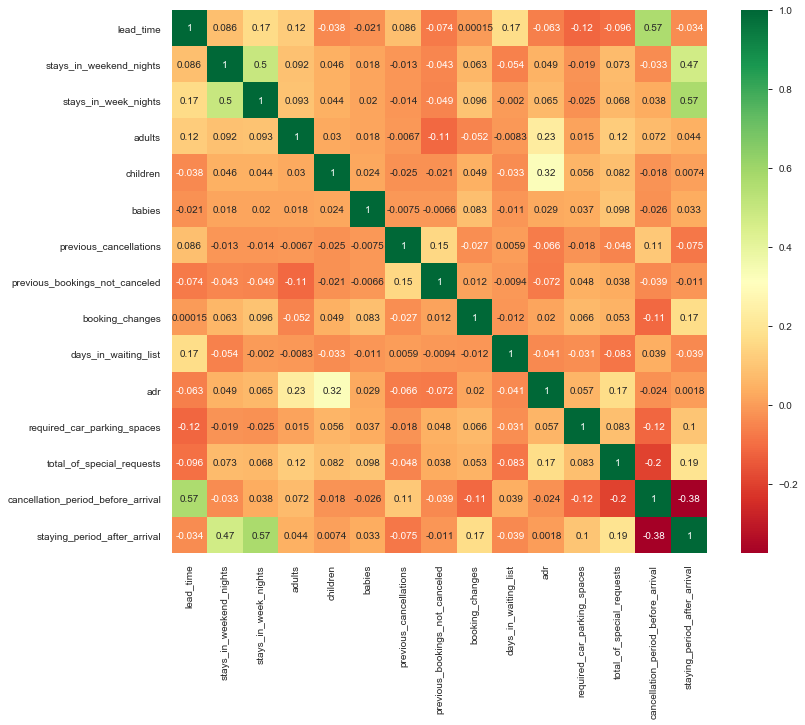

In [50]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data_numerical.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [51]:
#Encoding
data_categorical.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'customer_type', 'reservation_status_month',
       'reservation_status_year'],
      dtype='object')

In [52]:
data_categorical.head()

hotel is_canceled arrival_date_year arrival_date_month meal country  \
0  Resort Hotel           0              2015                  7   BB     PRT   
1  Resort Hotel           0              2015                  7   BB     PRT   
2  Resort Hotel           0              2015                  7   BB     GBR   
3  Resort Hotel           0              2015                  7   BB     GBR   
4  Resort Hotel           0              2015                  7   BB     GBR   

  market_segment distribution_channel is_repeated_guest reserved_room_type  \
0         Direct               Direct                 0               rare   
1         Direct               Direct                 0               rare   
2         Direct               Direct                 0                  A   
3           rare            Corporate                 0                  A   
4      Online TA                TA/TO                 0                  A   

  assigned_room_type deposit_type agent customer_type  \
0               rare   No Deposit     9     Transient   
1               rare   No Deposit     9     Transient   
2               rare   No Deposit     9     Transient   
3                  A   No Deposit  rare     Transient   
4                  A   No Deposit   240     Transient   

  reservation_status_month reservation_status_year  
0                        7                    2015  
1                        7                    2015  
2                        7                    2015  
3                        7                    2015  
4                        7                    2015

In [53]:
for col in data_categorical:
    print(data_categorical[col].value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
0    75166
1    44224
Name: is_canceled, dtype: int64
2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64
8       13877
7       12661
5       11791
10      11160
4       11089
6       10939
9       10508
3        9794
2        8068
11       6794
12       6780
rare     5929
Name: arrival_date_month, dtype: int64
BB      92310
HB      14463
SC      10650
rare     1967
Name: meal, dtype: int64
PRT     49078
rare    31913
GBR     12129
FRA     10415
ESP      8568
DEU      7287
Name: country, dtype: int64
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
rare              6277
Name: market_segment, dtype: int64
TA/TO        97870
Direct       14645
Corporate     6677
rare           198
Name: distribution_channel, dtype: int64
0       115580
rare      3810
Name: is_repeated_guest, dtype: int64
A       85994
D       19201
rare     7660
E        6535
Name:

In [54]:
data_categorical= pd.get_dummies(data_categorical, drop_first=True)

In [55]:
data_categorical.head()

hotel_Resort Hotel  is_canceled_1  arrival_date_year_2016  \
0                   1              0                       0   
1                   1              0                       0   
2                   1              0                       0   
3                   1              0                       0   
4                   1              0                       0   

   arrival_date_year_2017  arrival_date_month_2  arrival_date_month_3  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   

   arrival_date_month_4  arrival_date_month_5  arrival_date_month_6  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   arrival_date_month_7  arrival_date_month_8  arrival_date_month_9  \
0                     1                     0                     0   
1                     1                     0                     0   
2                     1                     0                     0   
3                     1                     0                     0   
4                     1                     0                     0   

   arrival_date_month_10  arrival_date_month_11  arrival_date_month_12  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   meal_HB  meal_SC  meal_rare  country_ESP  country_FRA  country_GBR  \
0        0        0          0            0            0            0   
1        0        0          0            0            0            0   
2        0        0          0            0            0            1   
3        0        0          0            0            0            1   
4        0        0          0            0            0            1   

   country_PRT  country_rare  market_segment_Groups  \
0            1             0                      0   
1            1             0                      0   
2            0             0                      0   
3            0             0                      0   
4            0             0                      0   

   market_segment_Offline TA/TO  market_segment_Online TA  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         1   

   market_segment_rare  distribution_channel_Direct  \
0                    0                            1   
1                    0                            1   
2                    0                            1   
3                    1                            0   
4                    0                            0   

   distribution_channel_TA/TO  distribution_channel_rare  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           1                          0   

   is_repeated_guest_rare  reserved_room_type_D  re

In [ ]:
Feature selection by GradientBoost Tree Importance

In [56]:

data_categorical.shape

(119390, 58)

In [57]:
data_numerical.shape

(119390, 15)

In [58]:
data_new=pd.concat([data_numerical,data_categorical],axis=1)

In [59]:
data_new.head()

lead_time  stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0        342                        0                     0       2       0.0   
1        737                        0                     0       2       0.0   
2          7                        0                     1       1       0.0   
3         13                        0                     1       1       0.0   
4         14                        0                     2       2       0.0   

   babies  previous_cancellations  previous_bookings_not_canceled  \
0       0                       0                               0   
1       0                       0                               0   
2       0                       0                               0   
3       0                       0                               0   
4       0                       0                               0   

   booking_changes  days_in_waiting_list   adr  required_car_parking_spaces  \
0                3                     0   0.0                            0   
1                4                     0   0.0                            0   
2                0                     0  75.0                            0   
3                0                     0  75.0                            0   
4                0                     0  98.0                            0   

   total_of_special_requests  cancellation_period_before_arrival  \
0                          0                                   0   
1                          0                                   0   
2                          0                                   0   
3                          0                                   0   
4                          1                                   0   

   staying_period_after_arrival  hotel_Resort Hotel  is_canceled_1  \
0                             0                   1              0   
1                             0                   1              0   
2                             1                   1              0   
3                             1                   1              0   
4                             2                   1              0   

   arrival_date_year_2016  arrival_date_year_2017  arrival_date_month_2  \
0                       0                       0                     0   
1                       0                       0                     0   
2                       0                       0                     0   
3                       0                       0                     0   
4                       0                       0                     0   

   arrival_date_month_3  arrival_date_month_4  arrival_date_month_5  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   arrival_date_month_6  arrival_date_month_7  arrival_date_month_8  \
0                     0                     1                     0   
1                     0                     1                     0   
2                     0                     1                     0   
3                     0                     1                     0   
4                     0                     1                     0   

   arrival_date_month_9  arrival_date_month_10  arrival_date_month_11  \
0                     0                      0                      0   
1                     0                      0                      0   
2                     0                      0                      0   
3                     0                      0                      0   
4                     0                      0                      0   

   arrival_date_month_12  meal_HB  meal_SC  meal_rar

In [60]:
data_new.drop(columns=['is_canceled_1'],inplace=True)

In [61]:
X=data_new
y=data.is_canceled

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

X_train.shape, X_test.shape

((95512, 72), (23878, 72))

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
import xgboost as xgb

from sklearn.metrics import roc_auc_score, r2_score

In [74]:
# the first step of this procedure  consists in building
# a machine learning algorithm using all the available features
# and then determine the importance of the features according
# to the algorithm

# set the seed for reproducibility
seed_val = 1000000000
np.random.seed(seed_val)

# build initial model using all the features
model_all_features = xgb.XGBClassifier(
    nthread=10, max_depth=4, n_estimators=500, learning_rate=0.05)

model_all_features.fit(X_train, y_train)

# calculate the roc-auc in the test set
y_pred_test = model_all_features.predict_proba(X_test)[:, 1]
auc_score_all = roc_auc_score(y_test, y_pred_test)
print('Test all features xgb ROC AUC=%f' % (auc_score_all))

Test all features xgb ROC AUC=0.999999


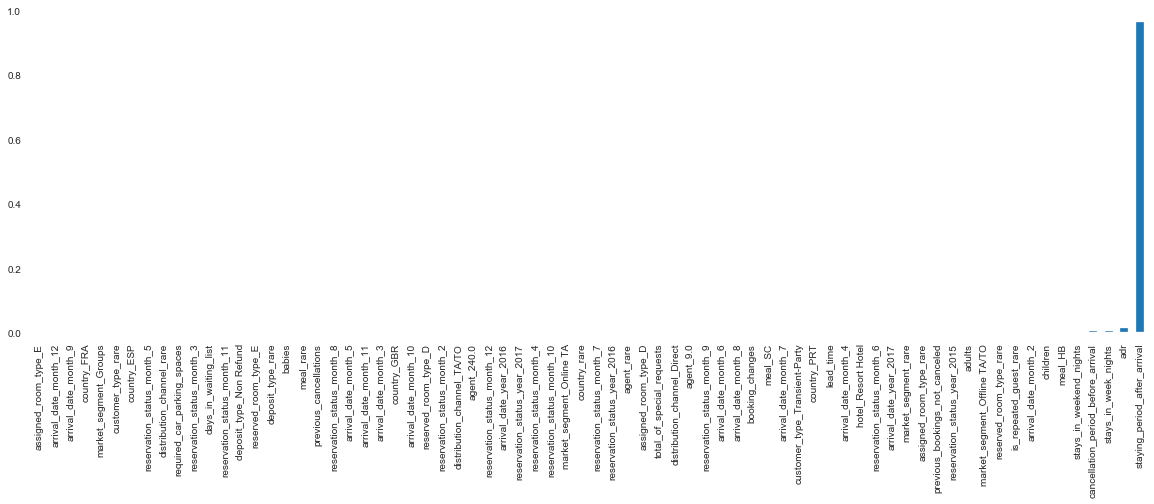

In [75]:
# the second step consist of deriving the importance of 
# each feature and ranking them from the least to the most
# important

# get feature name and importance
features = pd.Series(model_all_features.feature_importances_)
features.index = X_train.columns

# sort the features by importance
features.sort_values(ascending=True, inplace=True)

# plot
features.plot.bar(figsize=(20,6))

In [76]:
# view the list of ordered features
features = list(features.index)
features

['assigned_room_type_E',
 'arrival_date_month_12',
 'arrival_date_month_9',
 'country_FRA',
 'market_segment_Groups',
 'customer_type_rare',
 'country_ESP',
 'reservation_status_month_5',
 'distribution_channel_rare',
 'required_car_parking_spaces',
 'reservation_status_month_3',
 'days_in_waiting_list',
 'reservation_status_month_11',
 'deposit_type_Non Refund',
 'reserved_room_type_E',
 'deposit_type_rare',
 'babies',
 'meal_rare',
 'previous_cancellations',
 'reservation_status_month_8',
 'arrival_date_month_5',
 'arrival_date_month_11',
 'arrival_date_month_3',
 'country_GBR',
 'arrival_date_month_10',
 'reserved_room_type_D',
 'reservation_status_month_2',
 'distribution_channel_TA/TO',
 'agent_240.0',
 'reservation_status_month_12',
 'arrival_date_year_2016',
 'reservation_status_year_2017',
 'reservation_status_month_4',
 'reservation_status_month_10',
 'market_segment_Online TA',
 'country_rare',
 'reservation_status_month_7',
 'reservation_status_year_2016',
 'agent_rare',
 'a

In [81]:
from xgboost import XGBClassifier
print('Model: XGBoost\n')
model=(XGBClassifier(), X_train, X_test, y_train, y_test)

Model: XGBoost



In [83]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestRegressor()
classifier.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)